# EDA Analysis on House Regression

# 1 - Getting Data Ready

This EDA work was done for a PhD Subject, the purpose of this work is to provide an extensive data analysis. Machine Learning will be used in this work, however, we don't fully explore its main features and hyper parameterization, they are a mere tool for our analysis.  

The dataset used in this project was an open-source dataset from Kaggle. Our data set included 1460 houses (i.e., observations) accompanied by 79 attributes (i.e., features, variables, or predictors) and the sales price for each house. The selling price is a dependent variable on several other independent variables. The description of those variables can be found in Appendix. We decided to feature engineer two variables: (1) 'FullBath' and (2) 'AgeAsset'. First, we updated this value with the sum of 'HalfBath' and 'BsmtHalfBath' times a half to give us the complete total of baths in a house. Secondly, to overcome the time issue we, created a new variable 'AgeAsset' where we took the year that was sold ('YrSold') minus the year it was built ('YearBuilt'). Besides the variables used in the feature engineering process, we decided to drop 'GarageYrBlt', 'LotFrontage', 'YearRemodAdd' and 'MoSold' due to the number of missing values. Regarding the remaining missing values we have imputed as zero in 'MasVnrArea', in 'Electrical' as there was only one missing value we imputed the median, and the remaining 'MasVnrType', 'Alley', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence' and 'MiscFeature', we imputed as the categorical value of 'NA' as these were not missing values as mentioned in the description on each variable. For our analysis, we will use a total of 72 independent variables, of which 25 are numerical and 47 categorical.

## 1.1 - Importing Files and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys, os
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('default')
address_file = sys.path[0] 

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
data.shape

(1460, 81)

## 1.2 - Fill in NA

In [5]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

data['MasVnrType'] = data['MasVnrType'].fillna('None')

for col in ['Alley','BsmtExposure','BsmtQual','BsmtCond','BsmtCond','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']:
    data[col] = data[col].fillna('NA')

data['Electrical'] = data['Electrical'].fillna('SBrkr') ### only one with median

data = data.set_index('Id')
target = data['SalePrice'].copy()


data['AgeAsset'] = data['YrSold'] - data['YearBuilt']
data['FullBath'] = data['FullBath'] +data['HalfBath'] *0.5 + 0.5*data['BsmtHalfBath']

data = data.drop(columns={'SalePrice','GarageYrBlt','LotFrontage','YearBuilt','YrSold','YearRemodAdd','MoSold','HalfBath','BsmtHalfBath'})

In [6]:
data.shape

(1460, 72)

In [7]:
data.isna().sum().sum()

0

## 1.3 - Selecting numerical and categorical columns 

In [8]:
datanum = ['LotArea','MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
           'FullBath','KitchenAbvGr','TotRmsAbvGrd','BedroomAbvGr',
           'Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','AgeAsset']
datacat = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
            'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 
            'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
            'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'KitchenQual', 'Functional',
            'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
            'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

for col in datacat:
    data[col] = data[col].astype(str)
for col in datanum:
    data[col] = data[col].astype(float)

In [9]:
len(datanum)

25

In [10]:
len(datacat)

47

# 2 - Univariate Analysis

We can see all 25 numerical variables' distributions. All are right-skewed, with a possibility of outliers in more extreme cases. They seem not to follow a normal distribution with the possibility of exception in 'TotalBsmtSF', 'GrLivArea', '1stFlrSF’ and 'GarageArea'. In the Appendix, we can find all descriptive statistics for these variables. We can analyse that some variables have a mean, median and third quartile equal to zero (e.g., 'EnclosedPorch'). This raises the question if we should use this variable or if we should correct for outliers, as these variables have the most significant number of data points greater than the usual threshold for outliers (1.5x Inter Quartile Range).

They show a positive skewness (Pearson) , except for 'GarageCars', which goes in line with the previous visual analysis. The Kolmogorov-Smirnov (KS)  p-values are close to zero, below our critical value; therefore, we will reject the null hypothesis that variables follow a Normal Distribution. The top five variables with the most dispersions are 'PoolArea', 'MiscVal', '3SsnPorch', 'LowQualFinSF' and 'ScreenPorch' with a Coefficient of Variation above 370%. A boxplot for each numerical variable can be found in the Appendix, and next figure will give us a summary of the histograms for each variable. The trimmed mean presented in this work is calculated at 10%.


## 2.1 - Descriptive Analysis

In [11]:
stats_num = data.describe()
new = pd.DataFrame()
for col in datanum:
    new.loc[1,col] = stats.trim_mean(data[col], 0.1)
    new.loc[2,col] = data[col].skew()
    new.loc[3,col] = data[col].kurtosis()
    new.loc[4,col] = stats.kstest(((data[col]-data[col].mean())/data[col].std()),'norm')[1]
    new.loc[6,col] = data[col].std() / data[col].mean()
    new.loc[7,col] = np.quantile(data[col], 0.75) + (np.quantile(data[col], 0.75)-np.quantile(data[col], 0.25)) * 1.5
    new.loc[8,col] = np.quantile(data[col], 0.25) - (np.quantile(data[col], 0.75)-np.quantile(data[col], 0.25)) * 1.5
    new.loc[9,col] = len(data[col][(data[col] > np.quantile(data[col], 0.75) + (np.quantile(data[col], 0.75)-np.quantile(data[col], 0.25)) * 1.5) |      (data[col] < np.quantile(data[col], 0.25) - (np.quantile(data[col], 0.75)-np.quantile(data[col], 0.25)) * 1.5) ])
stats_num = stats_num.append(new)
stats_num = stats_num.rename(index={1:'trimmed mean', 2:'skew',3:'kurtosis',4:'ks p-value',5:'sw p-value',6:'Var Coef',7:'UL',8:'LL',9:'# Outliers'})
stats_num = stats_num.round(3)
#stats_num.to_excel(address_file+'/results/stats.xlsx')
stats_num

LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count           1460.000    1460.000    1460.000    1460.000   1460.000   
mean           10516.828     103.117     443.640      46.549    567.240   
std             9981.265     180.731     456.098     161.319    441.867   
min             1300.000       0.000       0.000       0.000      0.000   
25%             7553.500       0.000       0.000       0.000    223.000   
50%             9478.500       0.000     383.500       0.000    477.500   
75%            11601.500     164.250     712.250       0.000    808.000   
max           215245.000    1600.000    5644.000    1474.000   2336.000   
trimmed mean    9563.284      62.541     386.076       1.383    519.289   
skew              12.208       2.678       1.686       4.255      0.920   
kurtosis         203.243      10.141      11.118      20.113      0.475   
ks p-value         0.000       0.000       0.000       0.000      0.000   
Var Coef           0.949       1.753       1.028       3.466      0.779   
UL             17673.500     410.625    1780.625       0.000   1685.500   
LL              1481.500    -246.375   -1068.375       0.000   -654.500   
# Outliers        69.000      98.000       7.000     167.000     29.000   

              TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  ...  \
count            1460.000  1460.000  1460.000      1460.000   1460.000  ...   
mean             1057.429  1162.627   346.992         5.845   1515.464  ...   
std               438.705   386.588   436.528        48.623    525.480  ...   
min                 0.000   334.000     0.000         0.000    334.000  ...   
25%               795.750   882.000     0.000         0.000   1129.500  ...   
50%               991.500  1087.000     0.000         0.000   1464.000  ...   
75%              1298.250  1391.250   728.000         0.000   1776.750  ...   
max              6110.000  4692.000  2065.000       572.000   5642.000  ...   
trimmed mean     1036.695  1129.991   285.364         0.000   1467.670  ...   
skew                1.524     1.377     0.813         9.011      1.367  ...   
kurtosis           13.250     5.746    -0.553        83.235      4.895  ...   
ks p-value          0.000     0.000     0.000         0.000      0.000  ...   
Var Coef            0.415     0.333     1.258         8.319      0.347  ...   
UL               2052.000  2155.125  1820.000         0.000   2747.625  ...   
LL                 42.000   118.125 -1092.000         0.000    158.625  ...   
# Outliers         61.000    20.000     2.000        26.000     31.000  ...   

              GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count           1460.000    1460.000    1460.000     1460.000       1460.000   
mean               1.767     472.980      94.245       46.660         21.954   
std                0.747     213.805     125.339       66.256         61.119   
min                0.000       0.000       0.000        0.000          0.000   
25%                1.000     334.500       0.000        0.000          0.000   
50%                2.000     480.000       0.000       25.000          0.000   
75%                2.000     576.000     168.000       68.000          0.000   
max                4.000    1418.000     857.000      547.000        552.000   
trimmed mean       1.774     469.808      71.758       33.233          3.866   
skew              -0.343       0.180       1.541        2.364          3.090   
kurtosis           0.221       0.917       2.993        8.490         10.431   
ks p-value         0.000       0.000       0.000        0.000          0.000   
Var Coef           0.423       0.452       1.330        1.420          2.784   
UL                 3.500     938.250     420.000      170.000          0.000   
LL                -0.500     -27.750    -252.000     -102.000          0.000   
# Outliers         5.000      21.000      32.000       77.000        208.000   

              3SsnPorch  ScreenPorch

## 2.2 - Visualizing Single variable distribution

In [12]:
#Saving individual plots to file
#for col in datanum:
#    data.boxplot(column=[col])
#    plt.savefig(address_file+"/DataCat/"+col)
#    plt.clf()
#for col in datacat:
#    if col in ['OverallQual','OverallCond']:
#        sns.catplot(data=data, x=col, kind="count", order = ['0','1','2','3','4','5','6','7','8','9','10'])
#        plt.xticks(rotation=90)
#        plt.title(col)
#        plt.savefig(address_file+"/DataCat/"+col)
#        plt.clf()
#    else:
#        sns.catplot(data=data, x=col, kind="count", order = sorted(list(data[col].unique())))
#        plt.xticks(rotation=90)
#        plt.title(col)
#        plt.savefig(address_file+"/DataCat/"+col)
#        plt.clf()

we can conclude that all categorical variables do not follow a uniform distribution, and in some cases, the frequency of some categories is close to zero, which will question the use of those variables in our analysis. This will be further discussed in our Bivariate analysis as these will influence some of the tests performed, namely ANOVA.

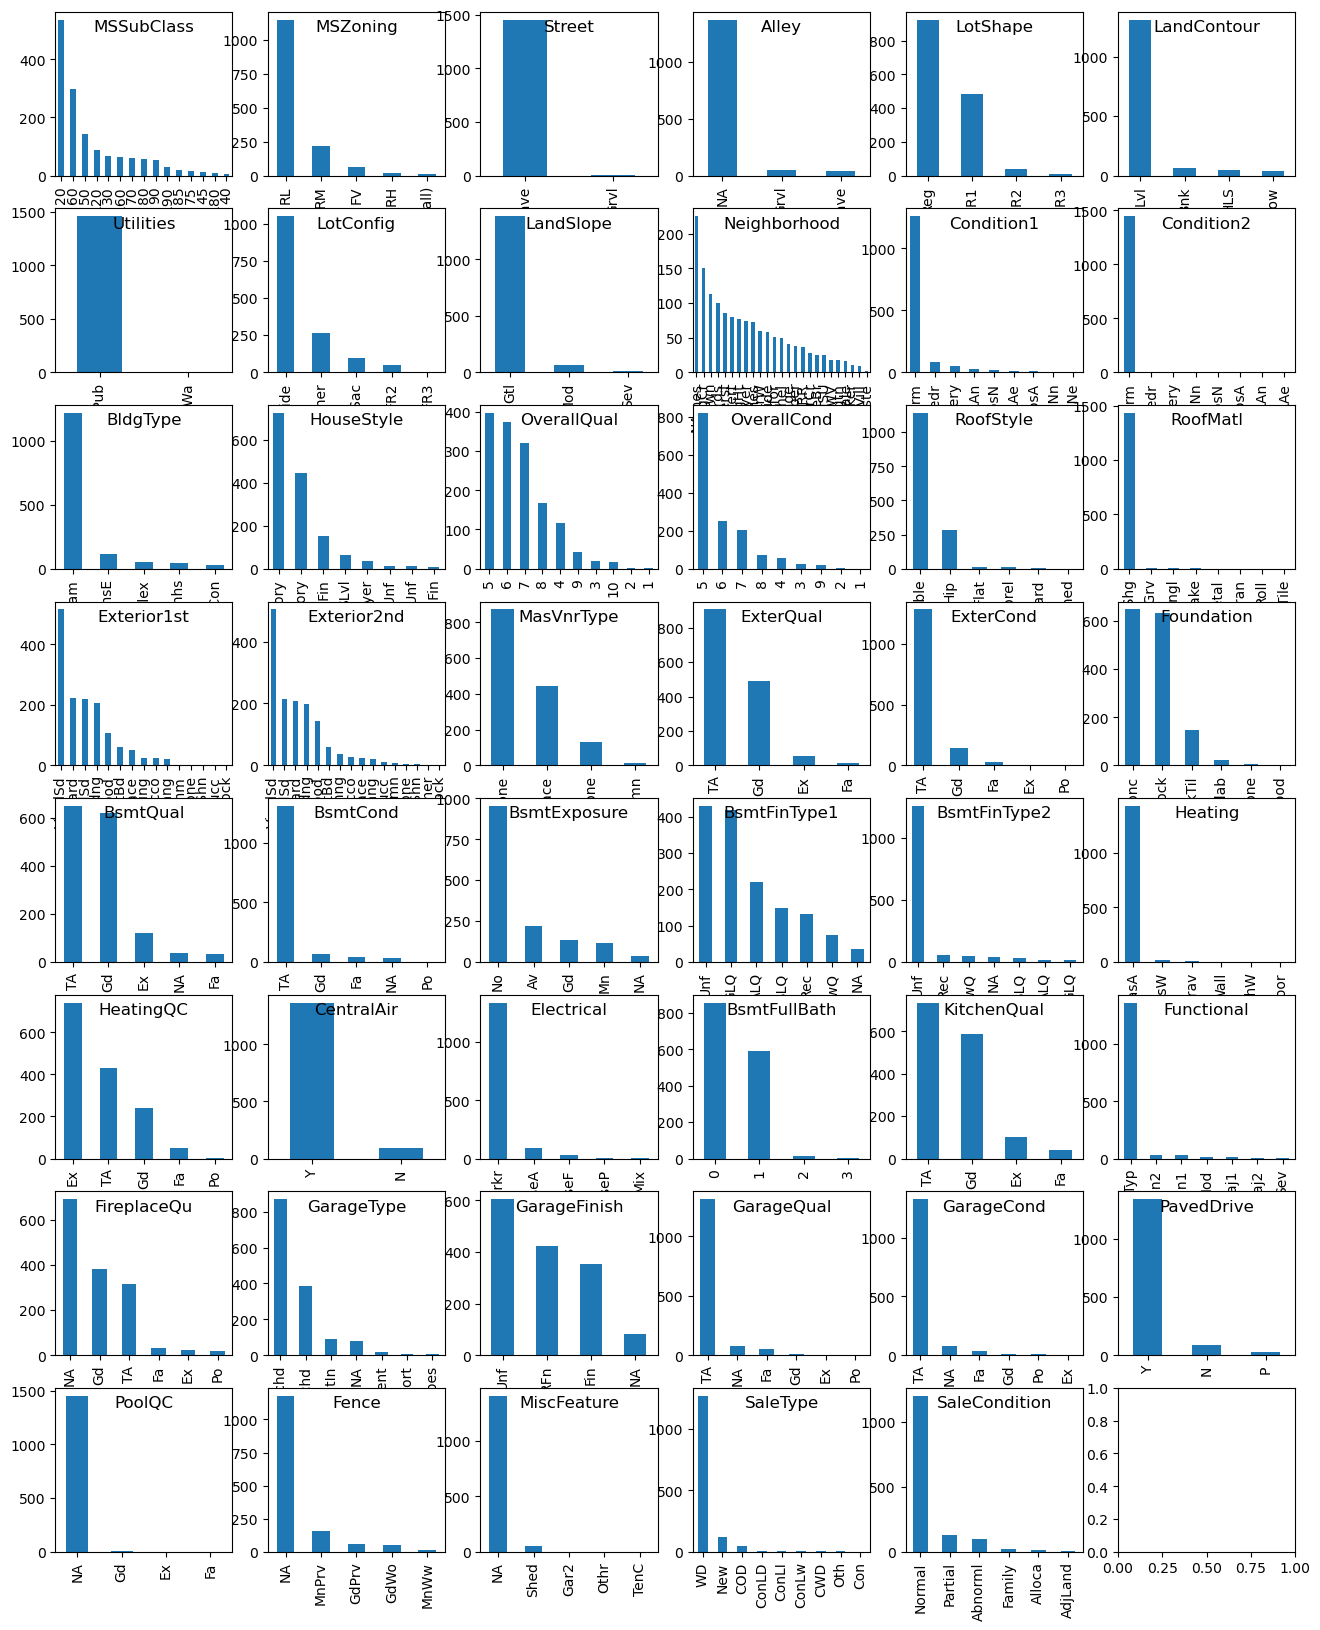

In [13]:
#Summary table for categorical
fig, ax = plt.subplots(8,6, figsize=(16,20))
for i, col in enumerate(data[datacat]):
    data[col].value_counts().plot(kind="bar", ax=ax[i//6,i%6]).set_title(col, y=1.0, pad=-14)
fig.show()

array([[<AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>],
       [<AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'BedroomAbvGr'}>,
        <AxesSubplot:title={'center':'KitchenAbvGr'}>,
        <AxesSubplot:title={'center':'TotRmsAbvGrd'}>,
        <AxesSubplot:title={'center':'Fireplaces'}>],
       [<AxesSubplot:title={'center':'GarageCars'}>,
        <AxesSubplot:title={'center':'GarageArea'}>,
        <AxesSubplot:title={'center':'WoodDeckSF'}>,
        <AxesSubplot:title={'center':'OpenPor

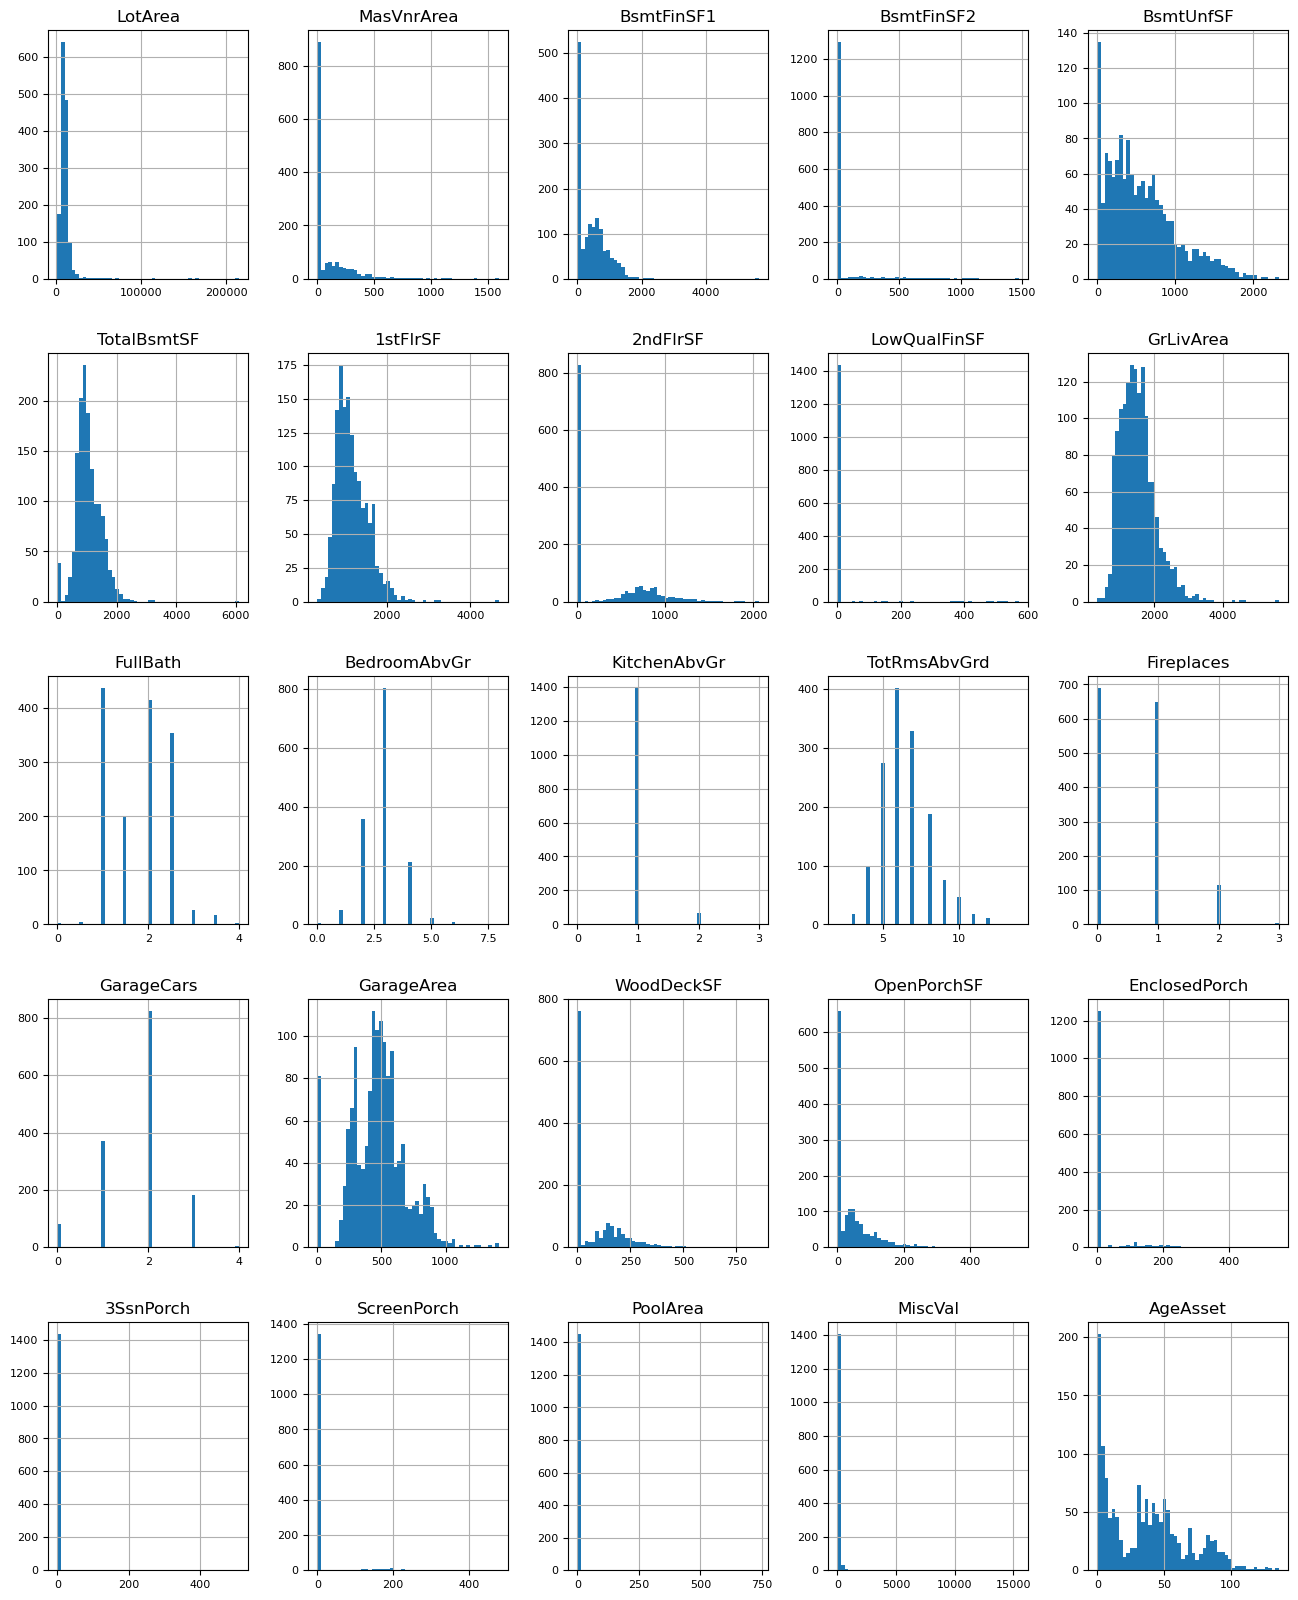

In [14]:
#Summary table for numerical
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

## 2.3 - Testing for normallity in 4 Variables

As mentioned previously, there are four variables visually, like a normal distribution. In this section, we will assess if outliers or transformations will affect our result.

Next figure, we can see the four Q-Q plots with log plus one transformation. We can see that with this transformation, 'GrLivArea' and '1stFlrSF' will now follow a normal distribution with a KS p-value of 0.19 and 0.24, respectively. 'GrLivArea' and '1stFlrSF' will now follow a normal distribution with a KS p-value of 0.19 and 0.24, respectively.

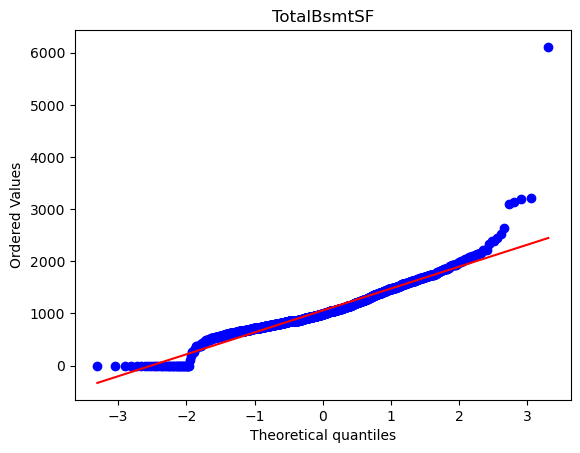

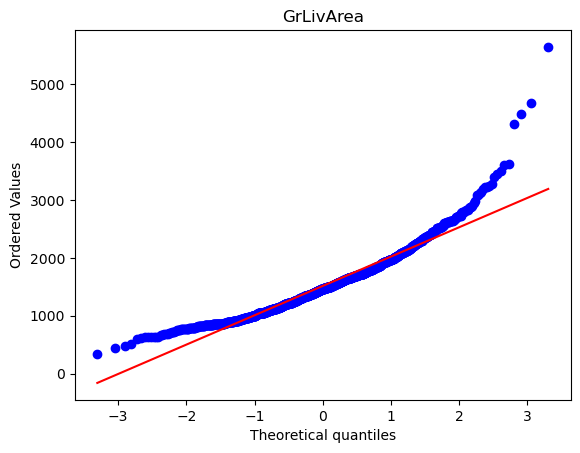

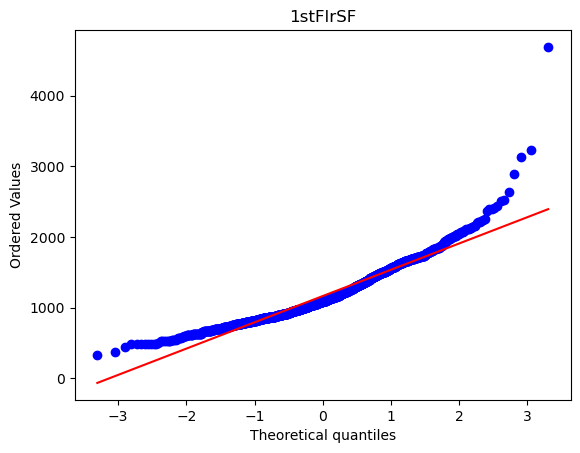

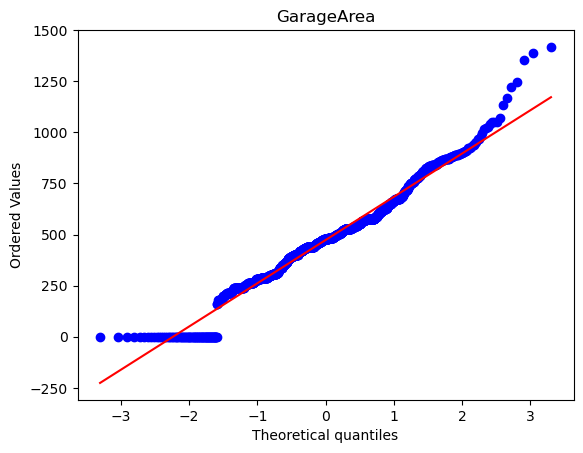

<Figure size 640x480 with 0 Axes>

In [15]:
for colt in ['TotalBsmtSF', 'GrLivArea', '1stFlrSF', 'GarageArea']:
        stats.probplot(data[colt],dist='norm',plot=plt)
        plt.title(colt)
        plt.show()
        plt.clf()

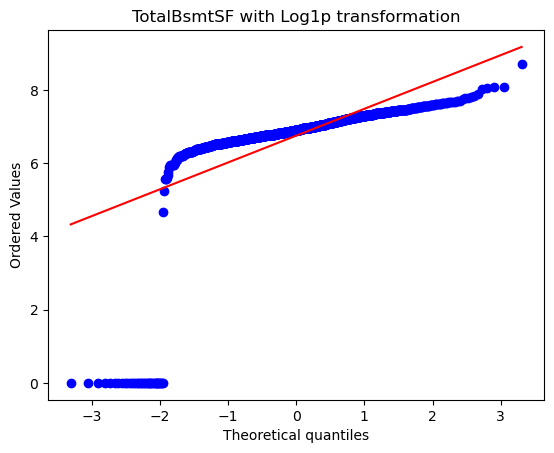

3.556234139644687e-119


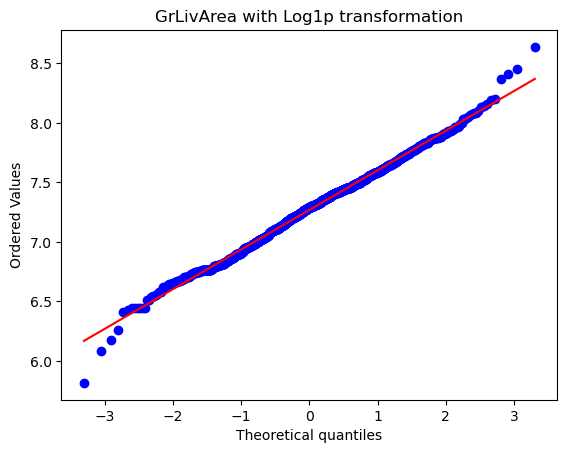

0.18971284739175753


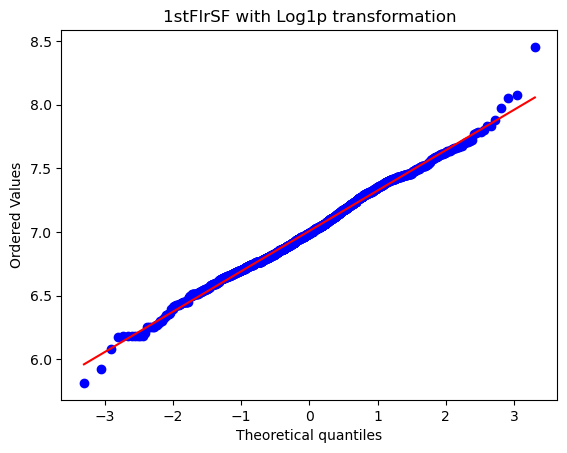

0.24372759266442


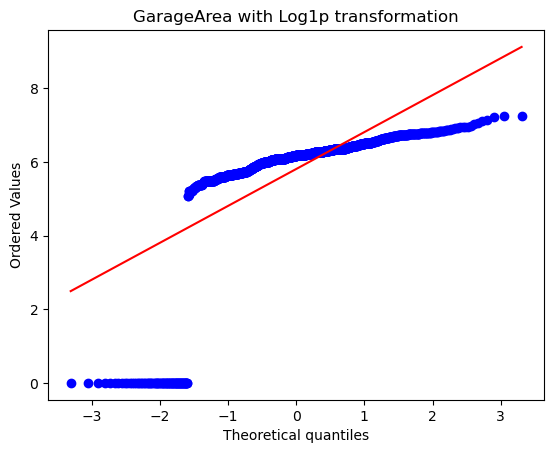

4.415650140375176e-136


<Figure size 640x480 with 0 Axes>

In [16]:
for colt in ['TotalBsmtSF', 'GrLivArea', '1stFlrSF', 'GarageArea']:
    test = np.log1p(data[colt])
    stats.probplot(test,dist='norm',plot=plt)
    plt.title(colt +' with Log1p transformation')
    plt.show()
    plt.clf()
    print(stats.kstest(((test-test.mean())/test.std()),'norm')[1])

## 2.4 - Outliers

We also need to analyse the possibility of outliers on each numerical variable. Next table shows the effect of removing the outliers from that variable to the main descriptive statistics. From this data, we start to question if the first eight variables on the table should be included in our study, as the Coefficient of Variance would be zero without the outliers. Also, the variable mainly affected by this removal (69 observations) would be the 'LotArea', as the mean would get significantly closer to the trimmed mean.

In [17]:
stats_num_woO = pd.DataFrame()
new = pd.DataFrame()
for col in datanum:
    test = data[col][(data[col] <= np.quantile(data[col], 0.75) + (np.quantile(data[col], 0.75)-np.quantile(data[col], 0.25)) * 1.5) & (data[col] >= np.quantile(data[col], 0.25) - (np.quantile(data[col], 0.75)-np.quantile(data[col], 0.25)) * 1.5) ]
    
    new.loc[1,col] = stats.trim_mean(test, 0.1)
    new.loc[2,col] = test.mean()
    new.loc[6,col] = test.std() / (test.mean()+0.0000000001)
    new.loc[7,col] = np.quantile(test, 0.75) + (np.quantile(test, 0.75)-np.quantile(test, 0.25)) * 1.5
    new.loc[8,col] = np.quantile(test, 0.25) - (np.quantile(test, 0.75)-np.quantile(test, 0.25)) * 1.5
    new.loc[9,col] = len(test[(test > np.quantile(test, 0.75) + (np.quantile(test, 0.75)-np.quantile(data[col], 0.25)) * 1.5) |      (test < np.quantile(test, 0.25) - (np.quantile(test, 0.75)-np.quantile(test, 0.25)) * 1.5) ])
stats_num_woO = stats_num_woO.append(new)
stats_num_woO = stats_num_woO.rename(index={1:'trimmed mean', 2:'Mean',3:'kurtosis',4:'ks p-value',5:'sw p-value',6:'Var Coef',7:'UL',8:'LL',9:'# Outliers'})
stats_num_woO = stats_num_woO.round(3)
#stats_num_woO.to_excel(address_file+'/results/stats_woO.xlsx')
stats_num_woO

LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
trimmed mean   9310.946      43.798     382.261         0.0    503.110   
Mean           9272.537      66.294     433.539         0.0    541.045   
Var Coef          0.345       1.603       0.978         0.0      0.749   
UL            16935.250     290.000    1762.500         0.0   1636.500   
LL             1725.250    -174.000   -1057.500         0.0   -635.500   
# Outliers       29.000      87.000       1.000         0.0     10.000   

              TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  ...  \
trimmed mean     1038.490  1120.976   284.547           0.0   1450.224  ...   
Mean             1059.736  1143.156   344.768           0.0   1476.752  ...   
Var Coef            0.328     0.302     1.255           0.0      0.305  ...   
UL               1997.250  2110.375  1820.000           0.0   2677.500  ...   
LL                 91.250   141.375 -1092.000           0.0    193.500  ...   
# Outliers          4.000     6.000     0.000           0.0      7.000  ...   

              GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
trimmed mean       1.769     464.892      67.147       27.704            0.0   
Mean               1.759     463.847      84.452       35.510            0.0   
Var Coef           0.419       0.433       1.267        1.245            0.0   
UL                 3.500     951.750     410.625      150.000            0.0   
LL                -0.500     -50.250    -246.375      -90.000            0.0   
# Outliers         0.000       0.000       3.000       31.000            0.0   

              3SsnPorch  ScreenPorch  PoolArea  MiscVal  AgeAsset  
trimmed mean        0.0          0.0       0.0      0.0    33.388  
Mean                0.0          0.0       0.0      0.0    36.038  
Var Coef            0.0          0.0       0.0      0.0     0.820  
UL                  0.0          0.0       0.0      0.0   124.500  
LL                  0.0          0.0       0.0      0.0   -63.500  
# Outliers          0.0          0.0       0.0      0.0     0.000  

[6 rows x 25 columns]

## 2.5 - Target Variable

Lastly, we will analyse our dependent variable: Sale Price. We can find the main descriptive analysis. Its KS p-value is lower than our critical value; therefore, we will reject the null hypothesis of our target variable following a normal distribution.

In [18]:
stats_tar = target.describe()
stats_tar.loc[1] = stats.trim_mean(target, 0.1)
stats_tar.loc[2] = target.skew()
stats_tar.loc[3] = target.kurtosis()
stats_tar.loc[4] = stats.kstest(((target-target.mean())/target.std()),'norm')[1]
stats_tar.loc[6] = target.std() / target.mean()
stats_tar.loc[7] = np.quantile(target, 0.75) + (np.quantile(target, 0.75)-np.quantile(target, 0.25)) * 1.5
stats_tar.loc[8] = np.quantile(target, 0.25) - (np.quantile(target, 0.75)-np.quantile(target, 0.25)) * 1.5
stats_tar.loc[9] = len(target[(target > np.quantile(target, 0.75) + (np.quantile(target, 0.75)-np.quantile(target, 0.25)) * 1.5) |      (target < np.quantile(target, 0.25) - (np.quantile(target, 0.75)-np.quantile(target, 0.25)) * 1.5) ])
stats_tar = stats_tar.rename(index={1:'trimmed mean', 2:'skew',3:'kurtosis',4:'ks p-value',5:'sw p-value',6:'Var Coef',7:'UL',8:'LL',9:'# Outliers'})
stats_tar = stats_tar.round(3)
#stats_tar.to_excel(address_file+'/results/target stats.xlsx')
stats_tar

count             1460.000
mean            180921.196
std              79442.503
min              34900.000
25%             129975.000
50%             163000.000
75%             214000.000
max             755000.000
trimmed mean    170783.291
skew                 1.883
kurtosis             6.536
ks p-value           0.000
Var Coef             0.439
UL              340037.500
LL                3937.500
# Outliers          61.000
Name: SalePrice, dtype: float64

<AxesSubplot:>

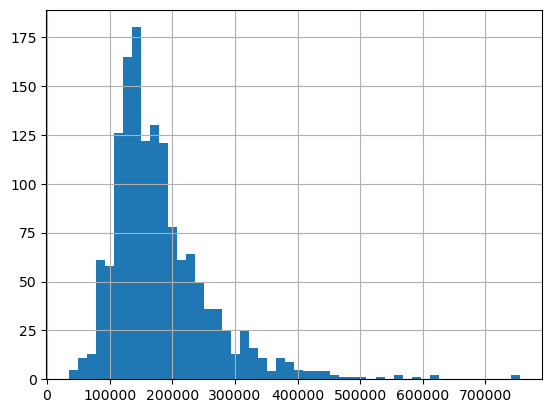

In [19]:
target.hist(bins=50)

the target variable without its possible outliers (1.5x Inter Quartile Range). There is an approximation from its mean towards its trimmed mean; however, the changes are not that relevant. We still must reject the hypothesis of the variable following a normal distribution.

In [20]:
stats_tar = target[(target <= np.quantile(target, 0.75) + (np.quantile(target, 0.75)-np.quantile(target, 0.25)) * 1.5) & (target >= np.quantile(target, 0.25) - (np.quantile(target, 0.75)-np.quantile(target, 0.25)) * 1.5) ].describe()
stats_tar.loc[1] = stats.trim_mean(target, 0.1)
stats_tar.loc[2] = target.skew()
stats_tar.loc[3] = target.kurtosis()
stats_tar.loc[4] = stats.kstest(((target-target.mean())/target.std()),'norm')[1]
stats_tar.loc[6] = target.std() / target.mean()
stats_tar.loc[7] = np.quantile(target, 0.75) + (np.quantile(target, 0.75)-np.quantile(target, 0.25)) * 1.5
stats_tar.loc[8] = np.quantile(target, 0.25) - (np.quantile(target, 0.75)-np.quantile(target, 0.25)) * 1.5
stats_tar.loc[9] = len(target[(target > np.quantile(target, 0.75) + (np.quantile(target, 0.75)-np.quantile(target, 0.25)) * 1.5) |      (target < np.quantile(target, 0.25) - (np.quantile(target, 0.75)-np.quantile(target, 0.25)) * 1.5) ])
stats_tar = stats_tar.rename(index={1:'trimmed mean', 2:'skew',3:'kurtosis',4:'ks p-value',5:'sw p-value',6:'Var Coef',7:'UL',8:'LL',9:'# Outliers'})
stats_tar = stats_tar.round(3)
#stats_tar.to_excel(address_file+'/results/target_woO.xlsx')
stats_tar

count             1399.000
mean            170237.127
std              59230.131
min              34900.000
25%             129000.000
50%             159500.000
75%             203500.000
max             340000.000
trimmed mean    170783.291
skew                 1.883
kurtosis             6.536
ks p-value           0.000
Var Coef             0.439
UL              340037.500
LL                3937.500
# Outliers          61.000
Name: SalePrice, dtype: float64

<AxesSubplot:>

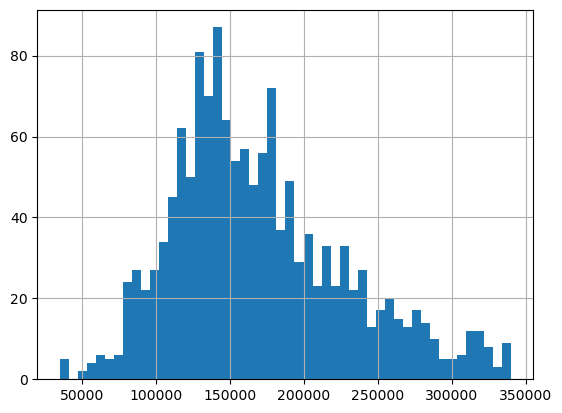

In [21]:
target[(target <= np.quantile(target, 0.75) + (np.quantile(target, 0.75)-np.quantile(target, 0.25)) * 1.5) & (target >= np.quantile(target, 0.25) - (np.quantile(target, 0.75)-np.quantile(target, 0.25)) * 1.5) ].hist(bins=50)

However, suppose we perform a log transformation to this variable; in that case, we can see that we no longer reject that our dependent variable will follow a normal distribution with a KS p-value of 0.015.

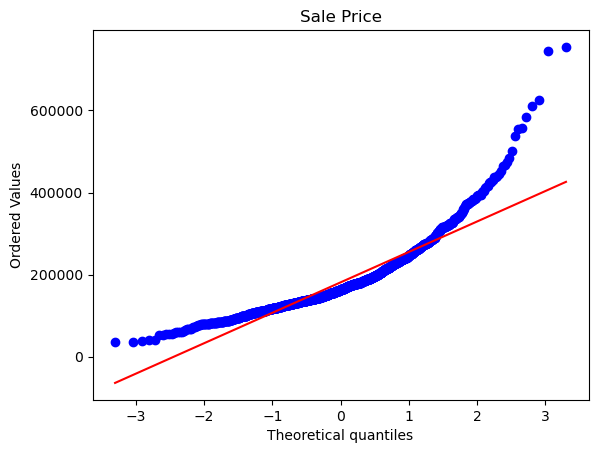

6.330230702928437e-20


<Figure size 640x480 with 0 Axes>

In [22]:
stats.probplot(target,dist='norm',plot=plt)
plt.title('Sale Price')
plt.show()
plt.clf()
print(stats.kstest(((target-target.mean())/target.std()),'norm')[1])

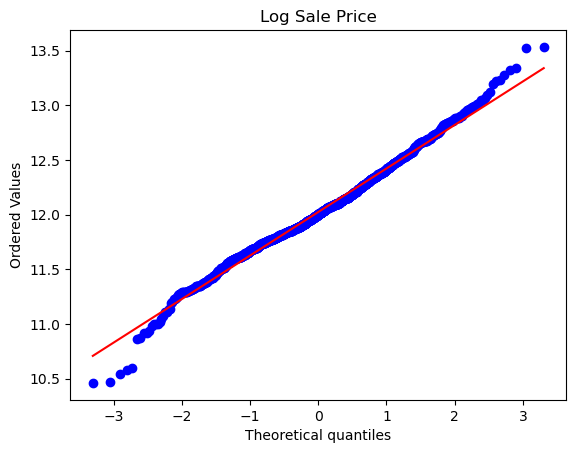

0.014665968087469361


<Figure size 640x480 with 0 Axes>

In [23]:
stats.probplot(np.log(target),dist='norm',plot=plt)
plt.title('Log Sale Price')
plt.show()
plt.clf()
print(stats.kstest(((np.log(target)-np.log(target).mean())/np.log(target).std()),'norm')[1])

Text(0.5, 1.0, 'Log of Sale Price')

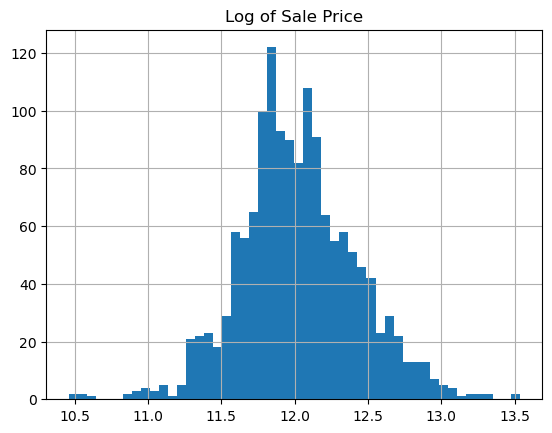

In [24]:
np.log(target).hist(bins=50)
plt.title('Log of Sale Price')

## 2.6 - Conclusion of Univariate Analysis

From this analysis, we will amend our main data set. We will transform 'GrLivArea' and '1stFlrSF' using a log plus one transformation and 'SalePrice' with a log transformation to assume normality.

At this point, we will not disregard any outliers as we will need to study further the possible outliers within 'LotArea' and gather more evidence if we need to remove them.

In [25]:
data['1stFlrSF'] = np.log1p(data['1stFlrSF'])
data['GrLivArea'] = np.log1p(data['GrLivArea'])

target = np.log(target)
full_data = pd.concat([data,target], axis=1)
full_data.rename(columns={'SalePrice':'log Sale Price','1stFlrSF':'log1p 1stFlrSF','GrLivArea':'log1p GrLivArea'},inplace=True)
datanum.remove('1stFlrSF')
datanum.remove('GrLivArea')
datanum.append('log1p 1stFlrSF')
datanum.append('log1p GrLivArea')

#del stats_num_woO,test,stats_tar,stats_num,new,data


# 3 - Bivariate Analysis


## 3.1 - Numerical versus log Sale Price

As most numerical variables do not follow a normal distribution, we will use Spearman's correlation for our analysis. we can see the correlation matrix.

<AxesSubplot:>

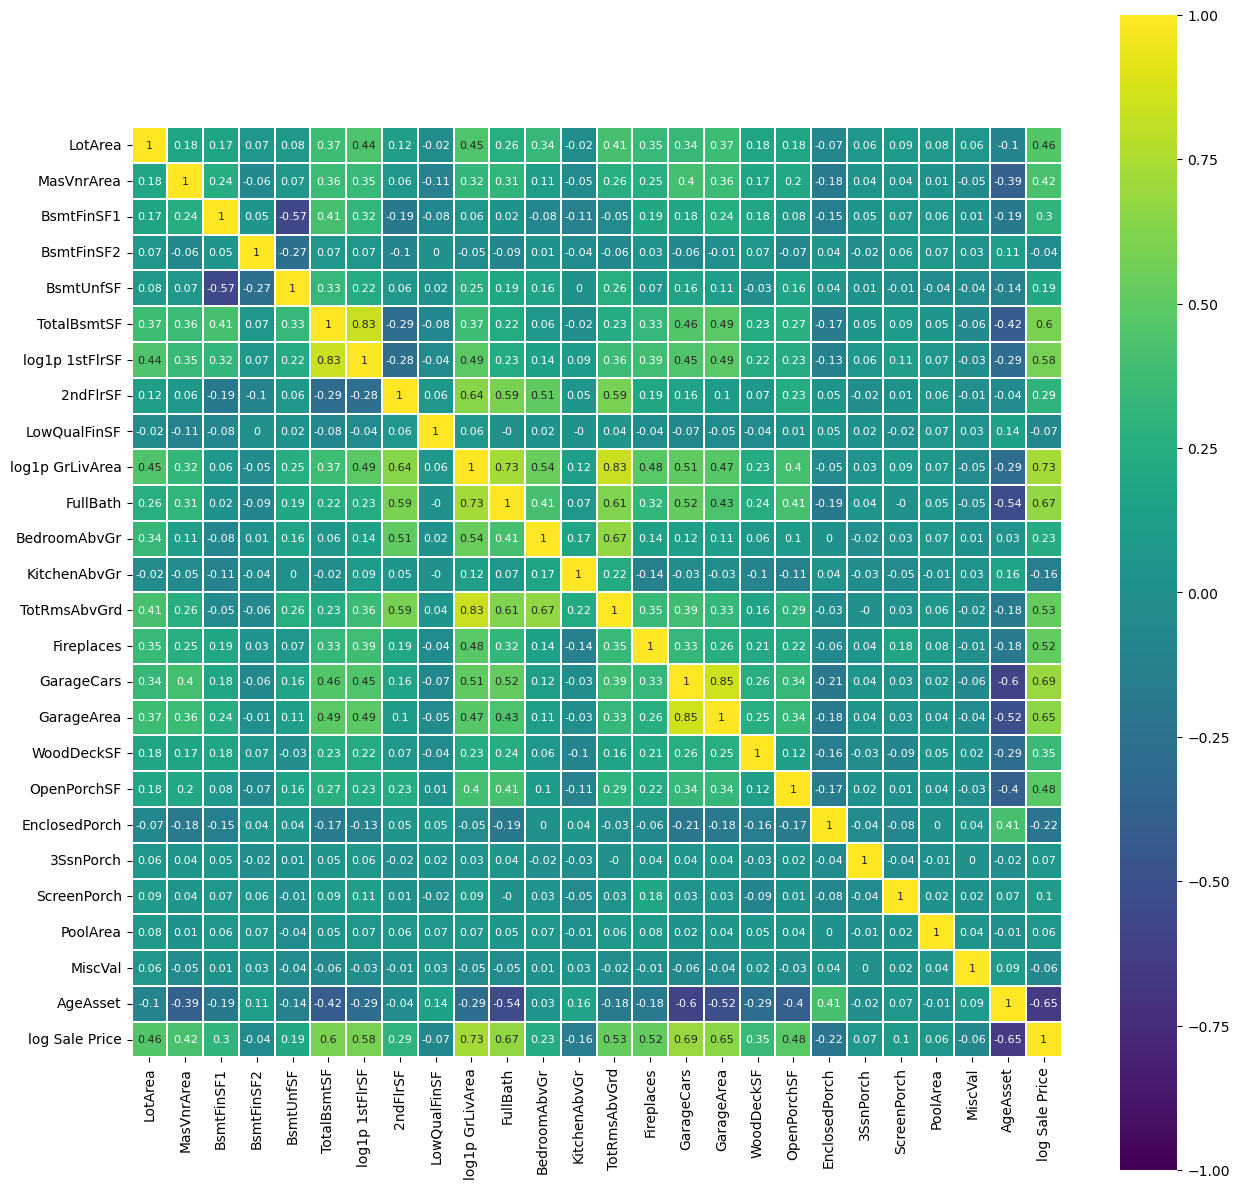

In [26]:
plt.figure(figsize=(15, 15))
sns.heatmap(data= full_data.corr('spearman').round(2),
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

Next table shows us the correlation of each variable against the log sale price. We can see that the most correlated feature is the Area of the house, followed by the number of Cars that can fit in the garage, which is quite common in urban areas, and, as expected, the age of the house has the highest negative correlation as the older the house, the lower the price it will be expected to be sold.

In [27]:
full_data.corr('spearman').round(4)['log Sale Price'].sort_values()

AgeAsset          -0.6501
EnclosedPorch     -0.2184
KitchenAbvGr      -0.1648
LowQualFinSF      -0.0677
MiscVal           -0.0627
BsmtFinSF2        -0.0388
PoolArea           0.0585
3SsnPorch          0.0654
ScreenPorch        0.1001
BsmtUnfSF          0.1852
BedroomAbvGr       0.2349
2ndFlrSF           0.2936
BsmtFinSF1         0.3019
WoodDeckSF         0.3538
MasVnrArea         0.4159
LotArea            0.4565
OpenPorchSF        0.4776
Fireplaces         0.5192
TotRmsAbvGrd       0.5326
log1p 1stFlrSF     0.5754
TotalBsmtSF        0.6027
GarageArea         0.6494
FullBath           0.6683
GarageCars         0.6907
log1p GrLivArea    0.7313
log Sale Price     1.0000
Name: log Sale Price, dtype: float64

As we have many observations, the critical region to reject the null hypothesis on Spearman's test of variables association will be significant,  CR:[-1,-0.0674] ∪ [0.0674,1]. Next figure will show us the variables that are associated with each other. There is not a single variable that is associated with every other variable. However, we have two variables: '3SsnPorch' and 'MiscVal', that are not associated with any other variable, but when analysed versus log sale price, both are not within the CR; therefore, we do not reject the null hypothesis: they are not associated. Although 'BsmtFinSF2' and 'PoolArea' are also outside the rejection area, they are associated with other variables that could help explain our need to be tested further to see if they are worth keeping in our analysis. These four variables could be removed from our analysis.

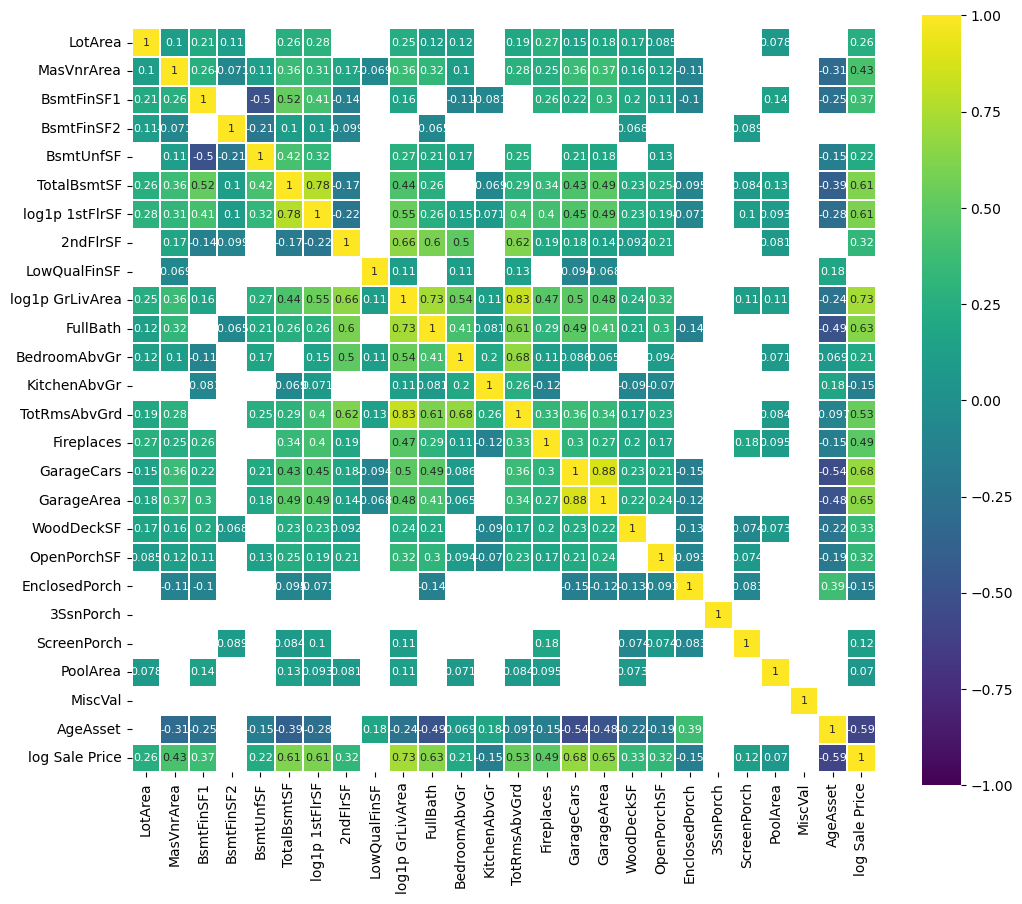

In [28]:
corr = full_data.corr()
plt.figure(figsize=(12, 10))

#Critical region to reject non associated classes: |0.0647|
sns.heatmap(corr[(corr >= 0.0647) | (corr <= -0.0647)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

By performing an analysis on the scatter plots of the main correlated numerical variables against the log sale price, we can identify one significant outlier (id. 1299) where the 'TotalBsmtSF' is above 6100, 'log1p 1stFlrSF' is above 8.4, 'log1p GrLivArea' is above 8.63, and 'GarageArea' is above 1200. We could consider other data points as an outlier: id. 1191 with the 'GarageArea' above 1200 and log sale price above 12; or ids. 305, 748 and 1417, where they have 'AgeAsset' longer than 110 years, but the log of the Sale price is high (above 12.4).

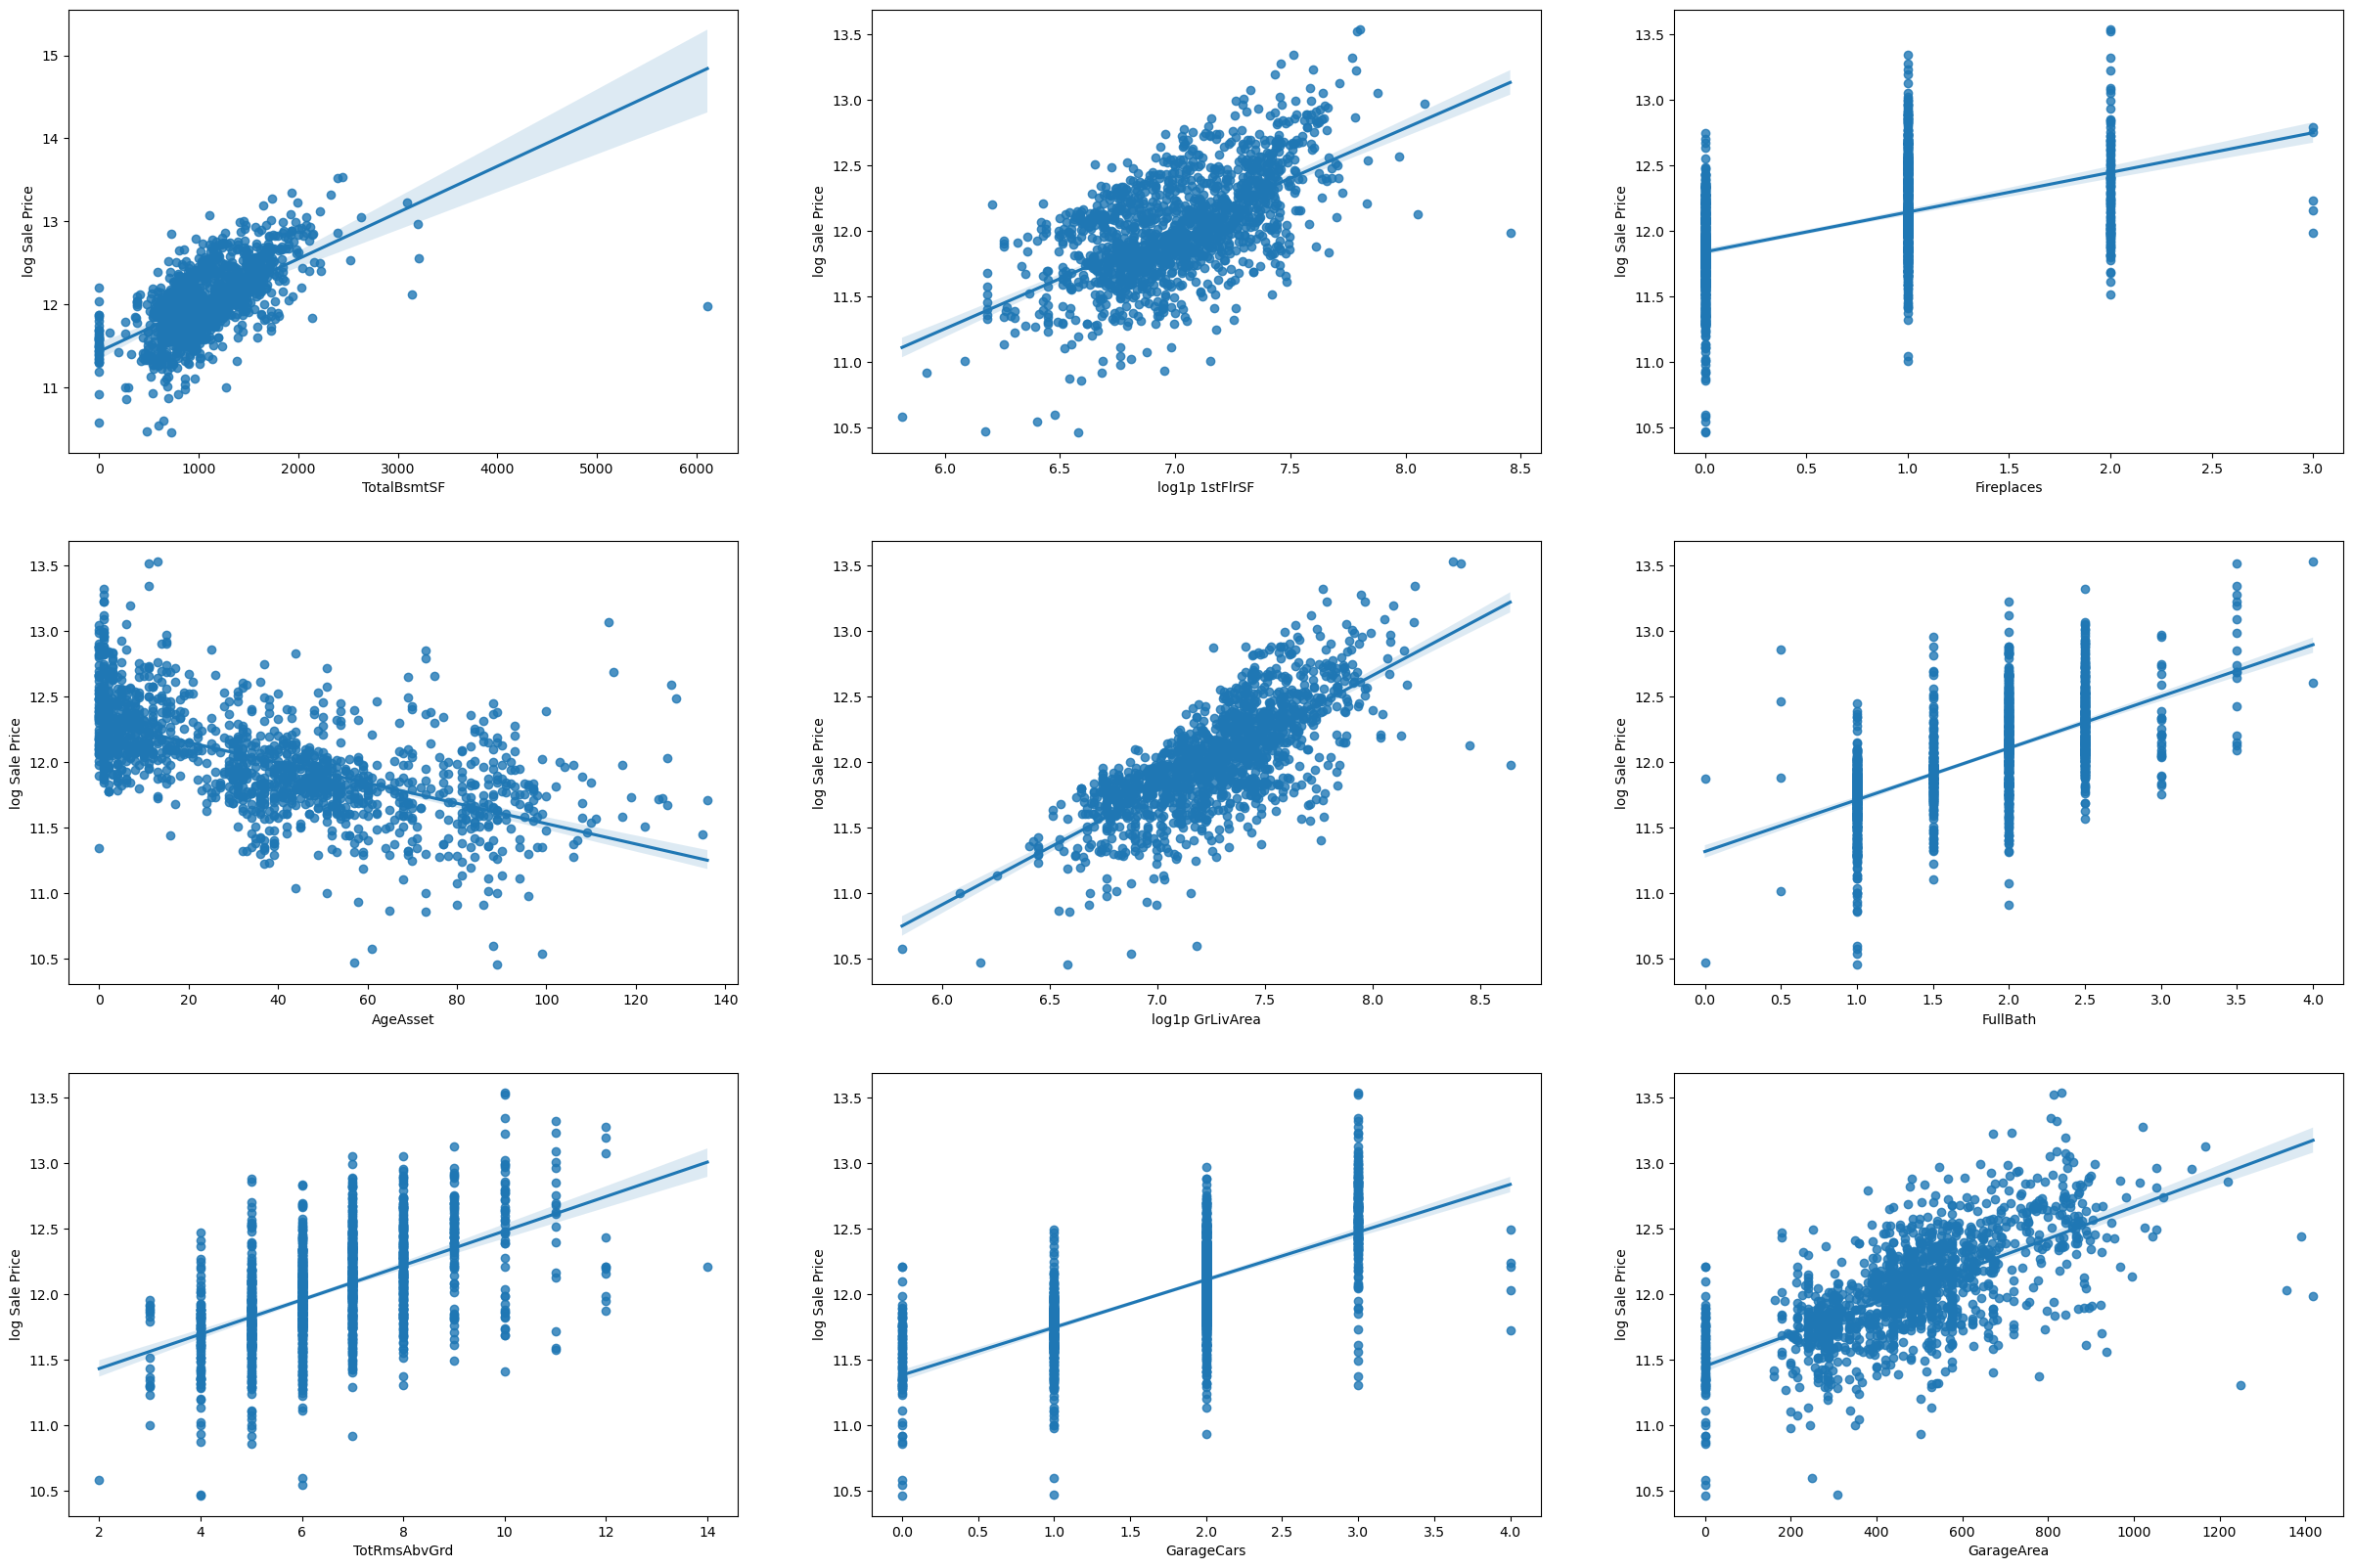

In [29]:
features_to_analyse = ['TotalBsmtSF', 'log1p 1stFlrSF', 'Fireplaces',
                       'AgeAsset', 'log1p GrLivArea', 'FullBath',
                       'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
                       'log Sale Price']
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (30, 20))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='log Sale Price', data=full_data[features_to_analyse], ax=ax)

In [30]:
full_data[full_data['TotalBsmtSF']>5000]['TotalBsmtSF']

Id
1299    6110.0
Name: TotalBsmtSF, dtype: float64

In [31]:
full_data[full_data['log1p 1stFlrSF']>=8.4]['log1p 1stFlrSF'] 

Id
1299    8.453827
Name: log1p 1stFlrSF, dtype: float64

In [32]:
full_data[full_data['log1p GrLivArea']>=8.6]['log1p GrLivArea'] 

Id
1299    8.638171
Name: log1p GrLivArea, dtype: float64

In [33]:
for i in full_data[(full_data['GarageArea']>=1200)]['GarageArea'].index:
    print(str(i) +" "+ str(target.iloc[i]))

582 11.682668239557323
826 11.603679828238693
1062 11.407564949312402
1191 12.066810578196666
1299 11.944707881395766


In [34]:
for i in full_data[(full_data['AgeAsset']>=110)]['AgeAsset'].index:
    if target.iloc[i] > 12.4:
        print(str(i) +" "+ str(target.iloc[i]))

305 12.631013530138995
748 12.46997418931655
1417 12.736700896592344


As it was found in the univariate analysis, we should also consider looking at 'LotArea' for outliers. The data points with id. 250, 314, 336 and 707 have more than 100.000 square feet of Lot Area, but their sale price is high.

<AxesSubplot:xlabel='LotArea', ylabel='log Sale Price'>

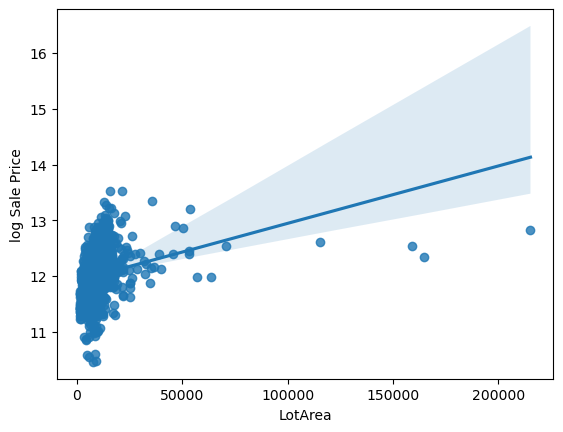

In [35]:
sns.regplot(x='LotArea',y='log Sale Price', data=full_data)

In [36]:
full_data[full_data['LotArea']>=100000]['LotArea']

Id
250    159000.0
314    215245.0
336    164660.0
707    115149.0
Name: LotArea, dtype: float64

## 3.2 - Categorical versus log Sale Price

The relationship between the sale price and the ordinal categorical is as expected; as quality increases, it is happening with the sale price.

In [37]:
#saving files 
#for i in datacat:
#    if i in ['OverallQual','OverallCond']:
#        plt.figure(figsize = (10, 6))
#        sns.boxplot(x=i, y='log Sale Price', data=full_data, order = ['0','1','2','3','4','5','6','7','8','9','10'])
#        plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
#        plt.xticks(rotation=45)
#        plt.title(i + " vs Log Sale Price")
#        plt.savefig(address_file+'/DataCat/'+i + " vs Log Sale Price")
#        plt.clf()
#    else:
#        plt.figure(figsize = (10, 6))
#        sns.boxplot(x=i, y='log Sale Price', data=full_data, order = sorted(list(full_data[i].unique())))
#        plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
#        plt.xticks(rotation=45)
#        plt.title(i + " vs Log Sale Price")
#        plt.savefig(address_file+"/DataCat/"+i + " vs Log Sale Price")
#        plt.clf()

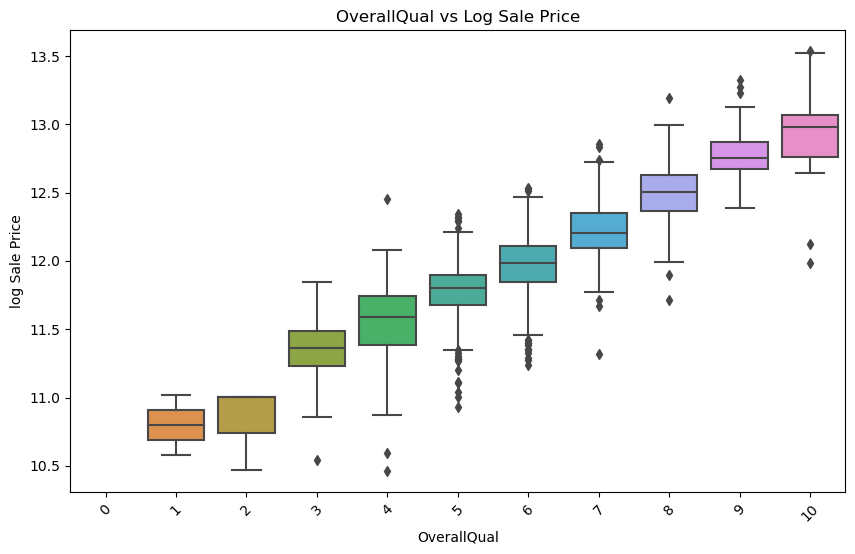

<Figure size 640x480 with 0 Axes>

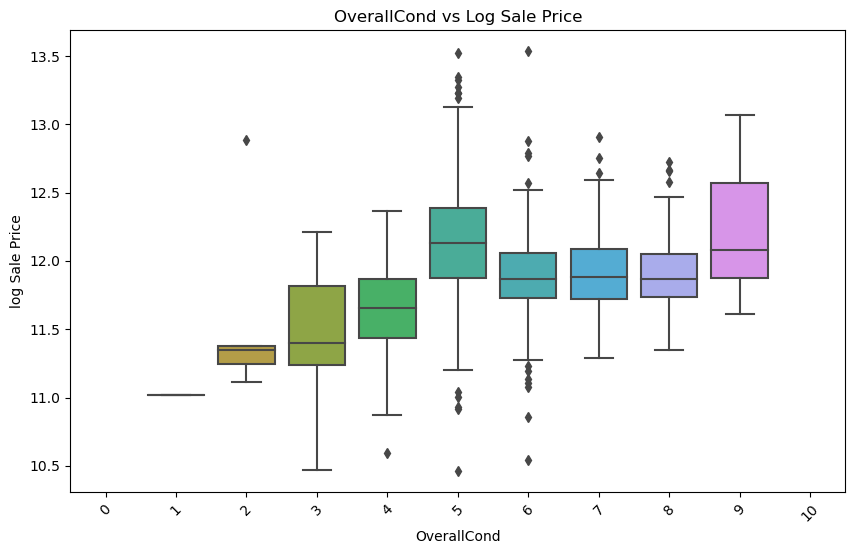

<Figure size 640x480 with 0 Axes>

In [38]:
#Showing the two main categorical:
for i in ['OverallQual','OverallCond']:
        plt.figure(figsize = (10, 6))
        sns.boxplot(x=i, y='log Sale Price', data=full_data, order = ['0','1','2','3','4','5','6','7','8','9','10'])
        plt.xticks(rotation=45)
        plt.title(i + " vs Log Sale Price")
        #plt.savefig(address_file+"/DataCat/"+i + " vs Log Sale Price")
        plt.show()
        plt.clf()

As for the remaining, we will have some variables that visually can be easier to identify to affect log sale price (e.g., 'SaleType') but others that could be dubious (e.g., 'LotConfig').

### 3.2.1 - Testing Variables for Normallity

For us to analyse if the features in each category have different means (ANOVA), first, we need to assess for normality of the log sale price on each feature. Next Tables shows a sample of the tests conducted that the KS p-value is below our critical value; therefore, we would reject the hypothesis of following a normal distribution. The entire table can be found in Appendix. Due to rejecting the hypothesis that the values follow a normal distribution, we will need to use the non-parametric ANOVA on these variables.

In [39]:
normality = pd.DataFrame()
normality['Variable'] = []
normality['Attribute'] = []
normality['KS p-value'] = []
for col in datacat:
    for i in sorted(list(full_data[col].unique())):
        oi = stats.kstest(((full_data[full_data[col]==i]['log Sale Price']-full_data[full_data[col]==i]['log Sale Price'].mean())/full_data[full_data[col]==i]['log Sale Price'].std()),'norm')[1]
        normality.loc[len(normality.index)] = [col, i, oi]
#normality.to_excel(address_file+'/results/normality for ANOVA.xlsx')
normality[(normality['KS p-value'] <=0.01) | (normality['KS p-value'].isna() == True) ]

Variable Attribute  KS p-value
4      MSSubClass        20    0.000772
18       MSZoning        RL    0.005521
28       LotShape       Reg    0.005061
34      Utilities    NoSeWa         NaN
51   Neighborhood   Gilbert    0.003175
80     Condition2      PosA         NaN
82     Condition2      RRAe         NaN
83     Condition2      RRAn         NaN
103   OverallQual         5    0.006796
108   OverallCond         1         NaN
120     RoofStyle       Hip    0.002988
123      RoofMatl   ClyTile         NaN
125      RoofMatl   Membran         NaN
126      RoofMatl     Metal         NaN
127      RoofMatl      Roll         NaN
132   Exterior1st   AsphShn         NaN
135   Exterior1st    CBlock         NaN
138   Exterior1st   ImStucc         NaN
150   Exterior2nd    CBlock         NaN
155   Exterior2nd     Other         NaN
169     ExterQual        TA    0.004088
173     ExterCond        Po         NaN
185      BsmtQual        TA    0.002159
190      BsmtCond        TA    0.006034
210       Heating     Floor         NaN
211       Heating      GasA    0.008579
219     HeatingQC        Po         NaN
222    CentralAir         Y    0.002154
226    Electrical       Mix         NaN
227    Electrical     SBrkr    0.008615
231  BsmtFullBath         3         NaN
235   KitchenQual        TA    0.006563
241    Functional       Sev         NaN
250    GarageType    Attchd    0.009245
256  GarageFinish       Fin    0.009546
259  GarageFinish       Unf    0.003204
265    GarageQual        TA    0.002136
271    GarageCond        TA    0.002438
274    PavedDrive         Y    0.005999
288   MiscFeature      TenC         NaN

In [40]:
data_nonp_anova = list(normality[(normality['KS p-value'] <= 0.01) | (normality['KS p-value'].isna() == True)]['Variable'].unique())
data_anova = list(set(datacat).difference(data_nonp_anova))

### 3.2.2 - ANOVA

Regarding the ANOVA results, we found that 'Street', and 'LandSlope', do not play a role in explaining the log sale price, while in the others, we would reject the null hypothesis (means are equal); therefore, there is a factor effect.

In [41]:
from scipy.stats import f_oneway

In [42]:
ANOVA = pd.DataFrame()
ANOVA['Variables'] = []
ANOVA['f_one way p-value'] =[]
for col in data_anova:
    params = [full_data[full_data[col]==list(full_data[col].unique())[i]]['log Sale Price'] for i in range(len(list(full_data[col].unique())))]
    ANOVA.loc[len(ANOVA.index)] = [col,f_oneway(*params)[1]] 
#ANOVA.to_excel(address_file+'/results/ANOVA Results.xlsx')
ANOVA

Variables  f_one way p-value
0     LandContour       3.086224e-08
1           Fence       6.560319e-13
2      HouseStyle       1.636077e-30
3          Street       2.837931e-02
4     FireplaceQu      6.963458e-115
5          PoolQC       7.695551e-03
6           Alley       1.358108e-09
7       LandSlope       3.388375e-01
8       LotConfig       6.214575e-07
9    BsmtFinType2       5.805632e-12
10     MasVnrType       1.670061e-65
11       SaleType       5.497893e-36
12   BsmtFinType1       4.321404e-78
13  SaleCondition       1.689708e-41
14     Condition1       1.173444e-10
15   BsmtExposure       2.590707e-47
16       BldgType       3.436794e-12
17     Foundation      1.350671e-111

While in the non-parametric ANOVA, we will use a Kruskal-Wallis  ANOVA test; we can conclude that every category can help explain the sale price, as we will reject the null hypothesis of the features in each category having the same mean; next table shows our results. In this case, we would not reject the null hypothesis for the variables: 'Utilities', 'Condition2' and 'MiscFeature'; they do not play a role in explaining the log of the sale price.

In [43]:
ANOVA = pd.DataFrame()
ANOVA['Variables'] = []
ANOVA['KW p-value'] =[]
for col in data_nonp_anova:
    params = [full_data[full_data[col]==list(full_data[col].unique())[i]]['log Sale Price'] for i in range(len(list(full_data[col].unique())))]
    ANOVA.loc[len(ANOVA.index)] = [col,stats.kruskal(*params)[1]] 
#ANOVA.to_excel(address_file+'/results/NP ANOVA Results.xlsx')
ANOVA

Variables     KW p-value
0     MSSubClass  1.896860e-104
1       MSZoning   3.080724e-57
2       LotShape   1.640323e-32
3      Utilities   5.233080e-01
4   Neighborhood  6.696799e-168
5     Condition2   1.303159e-02
6    OverallQual  3.506973e-202
7    OverallCond   4.133950e-47
8      RoofStyle   1.580733e-07
9       RoofMatl   8.597464e-03
10   Exterior1st   1.694486e-56
11   Exterior2nd   1.047636e-51
12     ExterQual  8.180798e-148
13     ExterCond   1.832365e-09
14      BsmtQual  1.209826e-144
15      BsmtCond   3.465401e-25
16       Heating   3.331280e-06
17     HeatingQC   6.036449e-76
18    CentralAir   5.319642e-33
19    Electrical   1.850352e-27
20  BsmtFullBath   6.005945e-16
21   KitchenQual  4.720113e-143
22    Functional   1.274180e-05
23    GarageType  7.581344e-112
24  GarageFinish  7.534250e-132
25    GarageQual   1.458782e-39
26    GarageCond   2.431209e-39
27    PavedDrive   7.012268e-26
28   MiscFeature   2.056095e-02

## 3.3 - Conclusion

In this chapter, we took a closer look at the multivariate analysis and the possibility of outliers. From our analysis, we considered the following ids as outliers: 1299, 250, 314, 336 and 707. The reason behind the first id. (1299) was due to having many variables as an outlier, and the remaining four were due to being an outlier in 'LotArea', which was identified as a possible generator of outliers previously. As we were not able to do a non-parametric two-way ANOVA, as our variables do not follow a normal distribution, we will not remove any categorical variable as these could help to explain the log of Sale Price through the intersection with other variables.

In [44]:
full_data = full_data.drop([1299,250,314,336,707])
#del corr,features_to_analyse,normality,data_nonp_anova,data_anova,ANOVA


# 4 - Principal Component Analysis

The purpose of this section is to explain principal component analysis (PCA). It is divided into two parts: (1) numerical and (2) Categorical variables.

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 4.1 - Numeric Variables (PCA)

We will start by standardising the independent variables and only then apply the normed PCA. As shown in the next figure, the number of principal components to explain at least 80% of the total Variance would be 13.

In [46]:
std_data = StandardScaler().fit_transform(full_data[datanum])

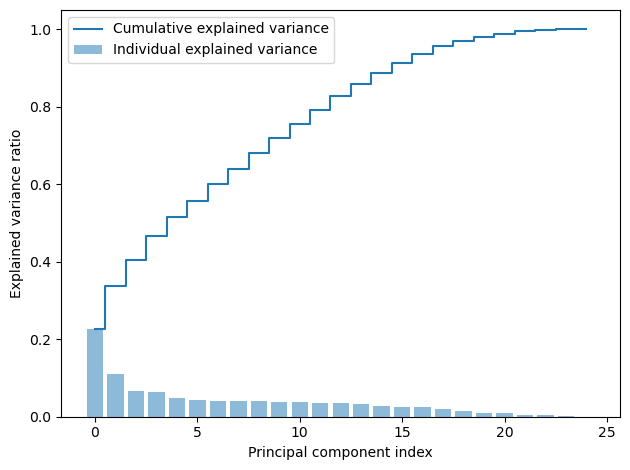

In [47]:
pca = PCA()
principalComponents = pca.fit_transform(std_data)
principalDf = pd.DataFrame(data = principalComponents)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [48]:
#Number of PCA to satisfy Pearson's Criteria (>=80%) is 13 components
cum_sum_eigenvalues[12]
for index, item in enumerate(cum_sum_eigenvalues):
    if item >= 0.8:
        print(f'Number os components are {index+1}, and explained variance is {item}') 
        break

Number os components are 13, and explained variance is 0.8274629144050727


Next table will provide us with detailed information about each component. As we can see in the first component, it differentiates large houses from old houses. In contrast, the second principal component separates houses with higher bedrooms and space on the 1st floor versus houses with ample basement space. In the next figure, we can see a scatter plot for each observation for the leading principal components. The observations that drive most of the dispersion for PC1 are the ids. 520 and 530, while for the principal component, two are the ids. 632 and 53.

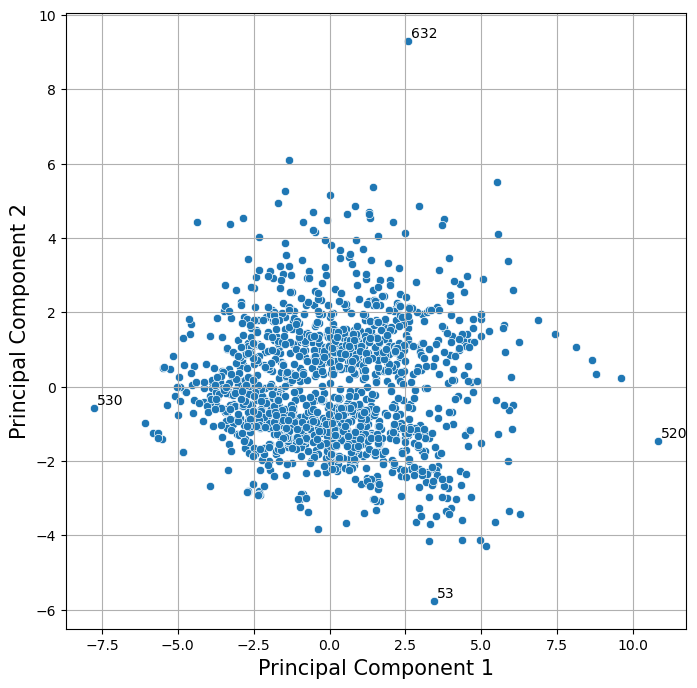

In [49]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component '+str(1), fontsize = 15)
ax.set_ylabel('Principal Component '+str(2), fontsize = 15)
sns.scatterplot(data=principalDf,x=0,y=1)
for i in [530,632,53,520]:
    plt.annotate(i, (principalDf.loc[i][0]+0.1, principalDf.loc[i][1]+0.1) )

ax.grid()

In [50]:
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(std_data)
data_PCA = pd.DataFrame(data = principalComponents)
data_PCA.index = full_data.index
data_PCA.set_axis(['PC '+ str(i)for i in range(1,14)], axis=1, inplace=True)
data_PCA

PC 1      PC 2      PC 3      PC 4      PC 5      PC 6      PC 7  \
Id                                                                           
1     0.846821  0.827845 -1.291613 -1.812153 -0.450981  0.368369  0.149217   
2     0.594754 -1.278081  0.398392 -0.846644 -0.805974 -0.732029 -0.345280   
3     1.078263  0.492828 -1.068836 -1.278447  0.193087  0.249940  0.370539   
4    -0.359688  1.706133  1.164300  0.587129 -0.020869 -1.263426  2.200013   
5     3.976543  0.845675 -0.728500 -1.421618 -0.336384 -0.337336  0.156669   
...        ...       ...       ...       ...       ...       ...       ...   
1456  0.647318  1.091974 -1.609184  0.147528  0.747112  0.078612 -0.091238   
1457  2.474971 -1.478240  1.737055  0.278546 -0.356673 -0.999906 -0.626117   
1458  1.194451  3.022275  1.234835  0.168703 -0.039823  2.041631 -0.757689   
1459 -2.709563 -1.063241  2.984479 -0.195884  1.027577 -2.814457 -3.319058   
1460 -0.405909 -1.397797  1.627094 -1.174846 -0.522837 -2.592656 -2.332386   

          PC 8      PC 9     PC 10     PC 11     PC 12     PC 13  
Id                                                                
1    -0.097936 -0.100811 -0.363744 -0.765943  0.512911  0.042930  
2     0.103690 -0.447894 -0.257268  0.830298 -0.500916 -0.135616  
3    -0.125432  0.289709  0.090245 -0.236942  0.077157 -0.146822  
4    -1.307384  3.052768  0.962014 -1.227779  1.075064 -0.363476  
5    -0.280703  0.242203  0.115246  0.008361  0.252558 -0.421403  
...        ...       ...       ...       ...       ...       ...  
1456  0.138836  0.165491  0.195300 -0.030510 -0.225757  0.010453  
1457 -0.204858 -0.515307  0.495468  1.396556 -0.848131 -0.338749  
1458  2.521452  2.089685  0.472671  2.852328  0.815642  0.443225  
1459 -0.280192 -0.741158  3.168423 -1.116167  0.824336 -0.876392  
1460  0.525218 -1.776666  0.367366  1.913180 -0.320508  0.429900  

[1455 rows x 13 columns]

In [51]:
PCA_components = pd.DataFrame(data=pca.components_).T
PCA_components.index = datanum
PCA_components.set_axis(['PC '+ str(i)for i in range(1,14)], axis=1, inplace=True)
#PCA_components.to_excel(address_file+'/results/PCA Components.xlsx')
PCA_components

PC 1      PC 2      PC 3      PC 4      PC 5      PC 6  \
LotArea          0.189431 -0.025282  0.334150  0.007257  0.000207 -0.073092   
MasVnrArea       0.215014 -0.087939 -0.090289 -0.082250 -0.102420  0.118882   
BsmtFinSF1       0.129813 -0.322505  0.288069 -0.337473 -0.309066  0.110100   
BsmtFinSF2      -0.008786 -0.059758  0.309525 -0.031953  0.236061 -0.163554   
BsmtUnfSF        0.137169  0.072388 -0.270490  0.634983  0.201355 -0.049936   
TotalBsmtSF      0.277043 -0.281923  0.132124  0.309153 -0.017737 -0.001104   
2ndFlrSF         0.173799  0.436900 -0.108067 -0.324554  0.087445 -0.026437   
LowQualFinSF    -0.003645  0.151810  0.192326  0.105839  0.170933 -0.139505   
FullBath         0.309278  0.180432 -0.212716 -0.154651  0.011166  0.001185   
KitchenAbvGr     0.009185  0.203395  0.062414  0.179793 -0.567546  0.234085   
TotRmsAbvGrd     0.305140  0.323804  0.080151  0.036022 -0.122013  0.032215   
BedroomAbvGr     0.175842  0.389350  0.092609  0.036932 -0.103810  0.021988   
Fireplaces       0.219910 -0.039153  0.236899 -0.093697  0.204507  0.067713   
GarageCars       0.312169 -0.152372 -0.193581 -0.036445 -0.011301 -0.050366   
GarageArea       0.302272 -0.177342 -0.137617 -0.019178 -0.021017 -0.058232   
WoodDeckSF       0.150749 -0.099812  0.063441 -0.178557 -0.060289 -0.467482   
OpenPorchSF      0.162044  0.014300 -0.048468 -0.041737  0.335194  0.088518   
EnclosedPorch   -0.067007  0.161452  0.265030  0.158303 -0.061250 -0.302070   
3SsnPorch        0.018663 -0.040501 -0.029959  0.045478 -0.092321  0.090079   
ScreenPorch      0.052430 -0.011304  0.227768 -0.036884  0.429022  0.606601   
PoolArea         0.035966  0.036510  0.202314 -0.082059  0.159922 -0.248595   
MiscVal         -0.009605  0.034290  0.091513 -0.014995 -0.131397  0.309318   
AgeAsset        -0.215023  0.252787  0.378321  0.138614 -0.031621  0.018707   
log1p 1stFlrSF   0.286646 -0.210510  0.241710  0.324241 -0.118662  0.024250   
log1p GrLivArea  0.363132  0.223838  0.072033 -0.012676 -0.002346 -0.007151   

                     PC 7      PC 8      PC 9     PC 10     PC 11     PC 12  \
LotArea          0.044770  0.063576 -0.005760  0.206471  0.197876  0.018374   
MasVnrArea       0.141092 -0.185547  0.074477 -0.064538  0.091133 -0.129466   
BsmtFinSF1       0.171041 -0.059195 -0.062405 -0.231046 -0.006647  0.075473   
BsmtFinSF2      -0.498995 -0.030116 -0.160093  0.457774 -0.335550  0.172794   
BsmtUnfSF       -0.014076  0.059236  0.079121 -0.014775  0.165141 -0.136073   
TotalBsmtSF     -0.028482 -0.010422 -0.042603 -0.080361  0.039187  0.000749   
2ndFlrSF         0.076910 -0.021087  0.078279  0.068379  0.016323  0.011626   
LowQualFinSF     0.165150  0.167031 -0.349325 -0.495287  0.009700  0.442052   
FullBath        -0.061817  0.056412 -0.045622  0.023593 -0.050157 -0.005977   
KitchenAbvGr    -0.269941 -0.021043 -0.097806 -0.070988 -0.282044 -0.028017   
TotRmsAbvGrd    -0.039228 -0.027804 -0.072562 -0.011361  0.012893  0.001840   
BedroomAbvGr    -0.092456 -0.022446 -0.139275  0.010377  0.027177 -0.120433   
Fireplaces       0.164069 -0.102649  0.110575  0.118565  0.260373 -0.174607   
GarageCars       0.026329 -0.018989  0.200394  0.057702 -0.273982  0.140411   
GarageArea       0.044553 -0.014973  0.209150  0.037220 -0.290435  0.200277   
WoodDeckSF      -0.246822  0.100100 -0.117511  0.034076  0.420487 -0.146092   
OpenPorchSF      0.009843  0.051921 -0.088346 -0.105522 -0.056552  0.417178   
EnclosedPorch    0.340459 -0.198642  0.509613  0.127208 -0.163889  0.161955   
3SsnPorch        0.527618  0.528999 -0.349071  0.473668 -0.149621 -0.087410   
ScreenPorch     -0.046094 -0.104103  0.024763 -0.034224 -0.093032 -0.225397   
PoolArea        -0.049377  0.461007  0.218217 -0.386612 -0.398106 -0.496044   
MiscVal         -0.249185  0.582208  0.485120  0.046397  0.318613  0.314401   
AgeAsset         0.153015 -0.117223  0.051835  0.047464  0.050529  0.024232   
log1p 1stFlrSF  -0.038103 -0.017826 -0.078946 -0.029681 -0.006338 -0.0

## 4.2 - CategoricalVariables (MCA)

When we transform our dataset of all 47 categorical variables into dummies, we will raise 303 dummies for each observation. To reach Pearson's criteria to achieve at least 80% of the total variance, we would need 49 principal components.

In [52]:
datacat_MCA = pd.get_dummies(full_data[datacat])

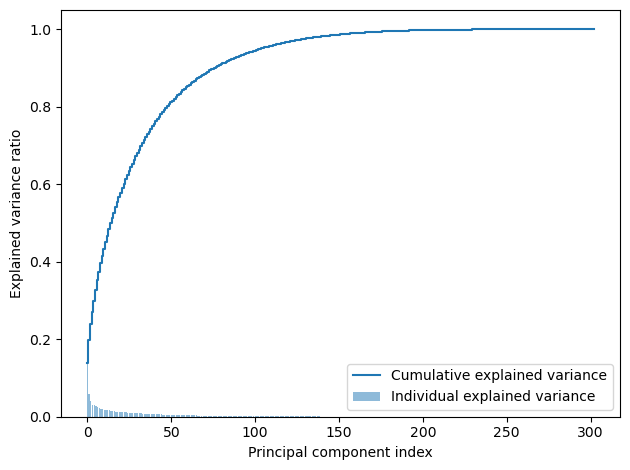

In [53]:
mca = PCA()
principalComponents = mca.fit_transform(datacat_MCA)
principalDf = pd.DataFrame(data = principalComponents)
exp_var_pca = mca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [54]:
#Number of PCA to satisfy Pearson's Criteria (>=80%) is 49 components
cum_sum_eigenvalues[12]
for index, item in enumerate(cum_sum_eigenvalues):
    if item >= 0.8:
        print(f'Number of components are {index+1}, and explained variance is {item}') 
        break

Number of components are 49, and explained variance is 0.801731061513051


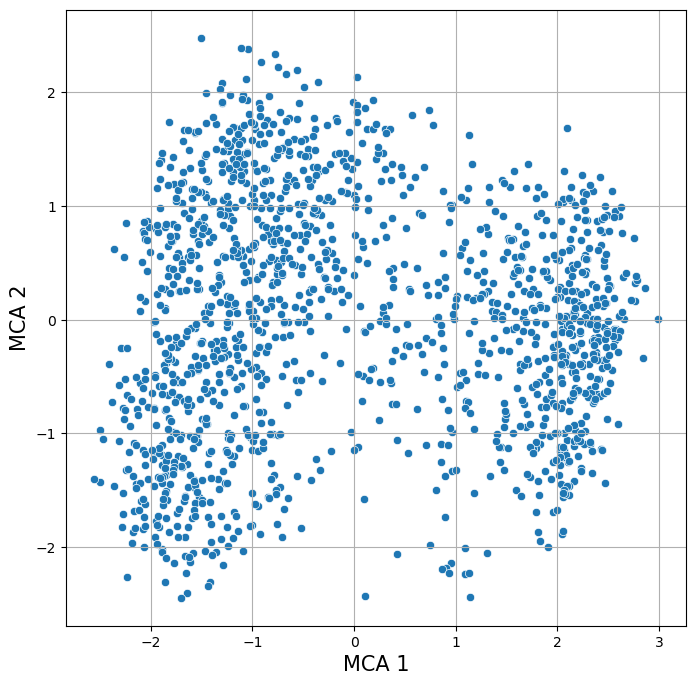

In [55]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('MCA '+str(1), fontsize = 15)
ax.set_ylabel('MCA '+str(2), fontsize = 15)
sns.scatterplot(data=principalDf,x=0,y=1)
ax.grid()

Next Table shows the principal component eigenvectors. The main distinction from the first component could be average quality versus good quality, mainly in the kitchen, exterior and Heating. The second component differentiates mainly between the '1-Story' from MSSubClass and the '2Story' in HouseStyle.

In [56]:
MPCA_components = pd.DataFrame(data=mca.components_).T
MPCA_components.set_axis(['MCA '+ str(i)for i in range(1,304)], axis=1, inplace=True)
MPCA_components.index = datacat_MCA.columns
#MPCA_components.to_excel(address_file+'/results/MCA Components.xlsx')
MPCA_components

MCA 1     MCA 2     MCA 3     MCA 4     MCA 5  \
MSSubClass_120         0.038870  0.008244 -0.044372  0.067811 -0.012653   
MSSubClass_160        -0.002695 -0.038774  0.033717  0.068518 -0.052959   
MSSubClass_180        -0.001079 -0.001635 -0.004232  0.025344 -0.000811   
MSSubClass_190        -0.011325 -0.013883 -0.008635  0.024768  0.015055   
MSSubClass_20          0.001071  0.269633 -0.272388 -0.211246 -0.142858   
...                         ...       ...       ...       ...       ...   
SaleCondition_AdjLand -0.001456 -0.001822 -0.002039  0.001739  0.000772   
SaleCondition_Alloca  -0.002662 -0.000098 -0.003018  0.006041 -0.001266   
SaleCondition_Family  -0.003413 -0.001297 -0.000131 -0.006775 -0.006036   
SaleCondition_Normal  -0.043054  0.033162  0.127897  0.109917  0.001641   
SaleCondition_Partial  0.068641 -0.025363 -0.104777 -0.101398  0.015731   

                          MCA 6     MCA 7     MCA 8     MCA 9    MCA 10  ...  \
MSSubClass_120         0.054397  0.012741 -0.060277 -0.122431 -0.029956  ...   
MSSubClass_160         0.070713 -0.017937 -0.076073 -0.031585  0.055011  ...   
MSSubClass_180         0.004069  0.016263  0.003568 -0.000632  0.000167  ...   
MSSubClass_190         0.010303  0.029260  0.015886 -0.010198  0.010436  ...   
MSSubClass_20         -0.131779 -0.098794  0.000774 -0.027522  0.007167  ...   
...                         ...       ...       ...       ...       ...  ...   
SaleCondition_AdjLand -0.000878  0.011819  0.002163 -0.001613  0.002706  ...   
SaleCondition_Alloca   0.001608  0.018294 -0.016842 -0.004815 -0.013302  ...   
SaleCondition_Family   0.008001 -0.000221 -0.011608 -0.001107 -0.000197  ...   
SaleCondition_Normal  -0.094231 -0.120751  0.108593 -0.043108 -0.056748  ...   
SaleCondition_Partial  0.083005  0.053214 -0.068985  0.042857  0.005587  ...   

                            MCA 294       MCA 295       MCA 296       MCA 297  \
MSSubClass_120        -0.000000e+00  0.000000e+00 -0.000000e+00 -0.000000e+00   
MSSubClass_160         5.414385e-17  1.582637e-16  2.174520e-16 -2.739375e-18   
MSSubClass_180        -1.710865e-16 -4.199760e-16 -7.500292e-18 -5.679906e-17   
MSSubClass_190        -7.484491e-17  7.424923e-17  3.009611e-16  1.481536e-16   
MSSubClass_20          3.050526e-17 -2.901800e-16 -2.715981e-16  1.521415e-16   
...                             ...           ...           ...           ...   
SaleCondition_AdjLand -6.198556e-03 -1.105730e-02 -1.432819e-03  1.496834e-02   
SaleCondition_Alloca  -6.198556e-03 -1.105730e-02 -1.432819e-03  1.496834e-02   
SaleCondition_Family  -6.198556e-03 -1.105730e-02 -1.432819e-03  1.496834e-02   
SaleCondition_Normal  -6.198556e-03 -1.105730e-02 -1.432819e-03  1.496834e-02   
SaleCondition_Partial -6.198556e-03 -1.105730e-02 -1.432819e-03  1.496834e-02   

                            MCA 298       MCA 299       MCA 300       MCA 301  \
MSSubClass_120        -0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
MSSubClass_160         2.005445e-16 -4.042194e-16 -9.058134e-17 -4.072236e-16   
MSSubClass_180        -1.938498e-16 -7.305022e-16  1.803154e-16  5.817710e-17   
MSSubClass_190        -5.663696e-16 -7.476272e-16 -8.664421e-17 -8.296715e-16   
MSSubClass_20          7.641061e-17  1.379958e-16  1.506110e-16 -1.102168e-16   
...                             ...           ...           ...           ...   
SaleCondition_AdjLand -5.723064e-02 -6.682586e-02  1.470465e-02  5.218289e-02   
SaleCondition_Alloca  -5.723064e-02 -6.682586e-02  1.470465e-02  5.218289e-02   
SaleCondition_Family  -5.723064e-02 -6.682586e-02  1.470465e-02  5.218289e-02   
SaleCondition_Normal  -5.723064e-02 -6.682586e-02  1.470465e-02  5.218289e-02   
SaleCondition_Partial -5.723064e-02 -6.682586e-02  1.470465e-02  5.218289e-02   

                            MCA 302       MCA 303  
MSSubClass_120         0.000000e+00 -0.000000e+00  
MSSubClass_160        -1.826565e-16  3.094042e-17  
MSSubClass_180        -1.555741e-16  3.673127e-16  
MSSubClass

Lastly, each observation is plotted in a scatter graph for MPC1 and MPC2. Although there is no precise observation driving this distinction, there is visual evidence of possible clusters within this data. This will be tested in the next section.

In [57]:
mca = PCA(n_components=49)
principalComponents = mca.fit_transform(datacat_MCA)
data_MCA = pd.DataFrame(data = principalComponents)
data_MCA.index = full_data.index
data_MCA.set_axis(['MPC '+ str(i)for i in range(1,50)], axis=1, inplace=True)
data_MCA

MPC 1     MPC 2     MPC 3     MPC 4     MPC 5     MPC 6     MPC 7  \
Id                                                                           
1     2.356021 -0.344437  0.372636  1.161962 -0.906414 -0.089057 -0.558861   
2    -0.435094  0.820682  0.314474 -0.168945 -0.418411 -0.354515 -0.074713   
3     2.763429  0.165848  1.018571  0.839975  0.044023 -0.580107 -0.134979   
4    -0.432054 -0.466197  0.572503 -0.071218  1.642007 -0.713429 -0.526193   
5     2.766270  0.320019  1.032052  0.744150  0.418726 -0.548249  0.097932   
...        ...       ...       ...       ...       ...       ...       ...   
1456  0.942015 -0.951219  1.243283 -0.385159 -1.022868 -0.006525  0.297894   
1457 -1.035860  1.813072  0.541016  0.489587 -0.477746  0.078152 -0.183490   
1458  0.358200 -0.526762  0.499935 -0.138930  0.547807  0.144375 -0.946838   
1459 -1.158869  1.371603 -1.157585  0.570868  0.238496 -0.066673 -0.881584   
1460 -0.888174  1.336162 -0.433285  0.313587 -0.425474 -0.290433 -0.226461   

         MPC 8     MPC 9    MPC 10  ...    MPC 40    MPC 41    MPC 42  \
Id                                  ...                                 
1     0.939549  0.519694  0.377266  ...  0.142447  0.120237 -0.284077   
2     0.072941 -0.677709 -0.484878  ... -0.177891  0.358658 -0.179270   
3     0.410933  0.234906  0.198412  ...  0.531894 -0.000836 -0.282777   
4    -0.591820  0.196249  0.188037  ... -0.309365  0.372301  0.139122   
5     0.275157  0.371069  0.508569  ... -0.142642  0.049016  0.161632   
...        ...       ...       ...  ...       ...       ...       ...   
1456  0.669255  0.826296 -1.170398  ... -0.015380 -0.129725  0.032642   
1457  0.114121 -0.237848 -1.263826  ... -0.008967  0.072142 -0.117477   
1458  0.978454 -0.850477 -0.361105  ... -0.331787  0.111606  0.115863   
1459  0.182182 -0.095997  0.088277  ... -0.328714  0.353052 -0.399671   
1460  0.467644  0.134913 -0.120010  ...  0.839796 -0.342435  0.050301   

        MPC 43    MPC 44    MPC 45    MPC 46    MPC 47    MPC 48    MPC 49  
Id                                                                          
1    -0.020217 -0.211432 -0.080619  0.076189  0.053686 -0.047168 -0.104642  
2    -0.372218  0.364875  0.169907 -0.605135 -0.281625 -0.067440 -0.183842  
3     0.151600  0.284564  0.016757 -0.053272  0.428257 -0.124434 -0.322026  
4     0.491370 -0.143226 -0.744461  0.074505  0.299073  0.408941  0.366323  
5     0.398104 -0.038153 -0.304228  0.031174 -0.082940  0.058658 -0.021563  
...        ...       ...       ...       ...       ...       ...       ...  
1456  0.018020 -0.012228  0.057939  0.114913  0.048616 -0.034311 -0.014064  
1457 -0.693765  0.002111  0.429345  0.147340  0.214321 -0.100850  0.590008  
1458  0.137458  0.178177 -0.531825  0.214931 -0.308302  0.130898 -0.431475  
1459 -0.125225  0.193187  0.241653 -0.465711  0.701889  0.007442 -0.129935  
1460 -0.114667 -0.737593  0.471223 -0.044994 -0.001749  0.133334  0.273360  

[1455 rows x 49 columns]

## 4.3 - Conclusion

From this quick analysis, we will work from now on two datasets: (1) the dataset after excluding outliers, and (2) the dataset with principal components for numerical and categorical variables (the same 1455 observations but with only 62 independent variables).

In [58]:
full_PCA_data = data_PCA.join(data_MCA)
full_PCA_data.index = full_data.index
full_PCA_data = full_PCA_data.join(target)
full_PCA_data.rename(columns={'SalePrice': 'log Sale Price'}, inplace= True)

#del std_data, pca, principalDf, principalComponents, exp_var_pca, cum_sum_eigenvalues, data_PCA, PCA_components, datacat_MCA, MPCA_components, mca

# 5 - Cluster Analysis

In this section, we will use Forgy's method (1965) of k-Means due to having a large dataset. This methodology will apply to the numerical features of our model, as the k-Means algorithm does not apply to categorical data, as categorical variables are discrete and do not have any natural origin. Therefore, calculating Euclidean distance for such space is not meaningful.

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [60]:
Cluster_data =pd.DataFrame(StandardScaler().fit_transform(full_data[datanum]))
Cluster_data.index = full_data.index
Cluster_data.set_axis(datanum, axis=1, inplace=True)
Cluster_data = Cluster_data.astype(float)

## 5.1 - Standard Dataset

First, to establish our number of clusters, we will use the average Silhouette score method; as shown, the number of clusters to be used is 6.

Suppose we plot this information on the most important variables, given by Spearman’s correlation matrix, versus the log of the sale price. In that case, we can easily identify each cluster within ‘log1p GrLivArea’, ‘TotalBsmtSF’ and ‘log1p 1stFlrSF.

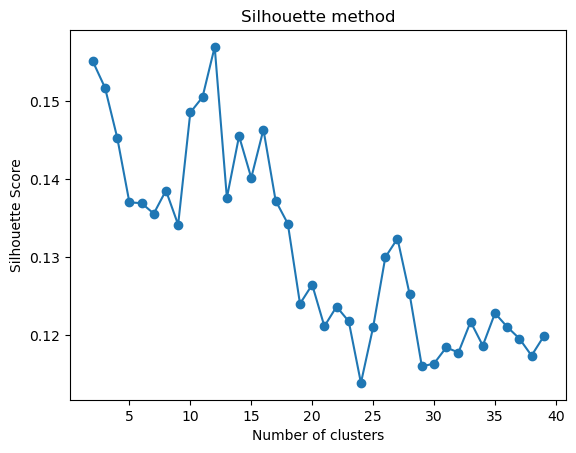

In [61]:
inertias = []
for i in range(2,40):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Cluster_data)
    inertias.append(silhouette_score(Cluster_data,kmeans.labels_))

plt.plot(range(2,40), inertias, marker='o')
plt.title('Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show() 

In [62]:
kmeans = KMeans(n_clusters=6)
Cluster = pd.DataFrame(kmeans.fit_predict(Cluster_data))
Cluster.index = full_data.index

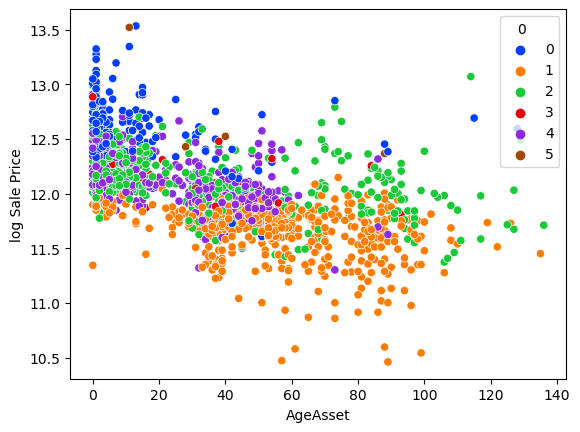

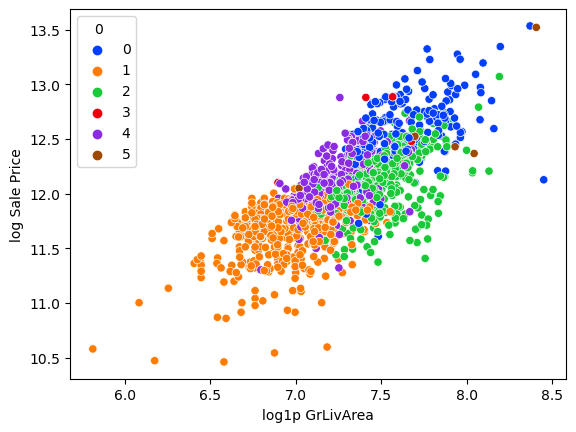

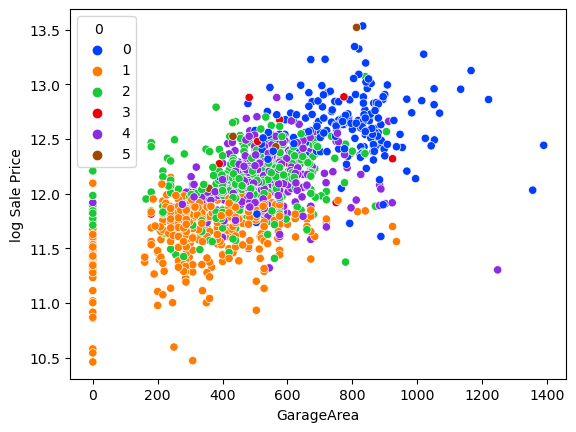

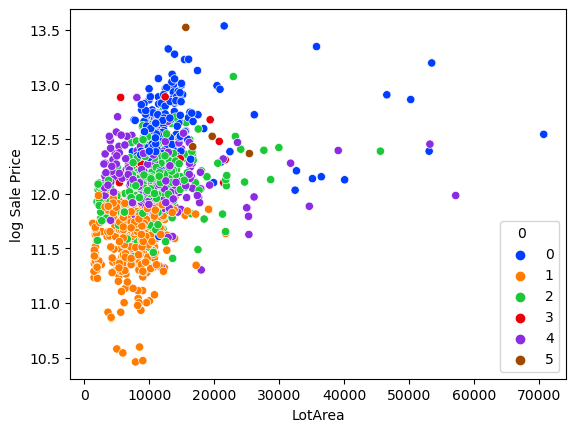

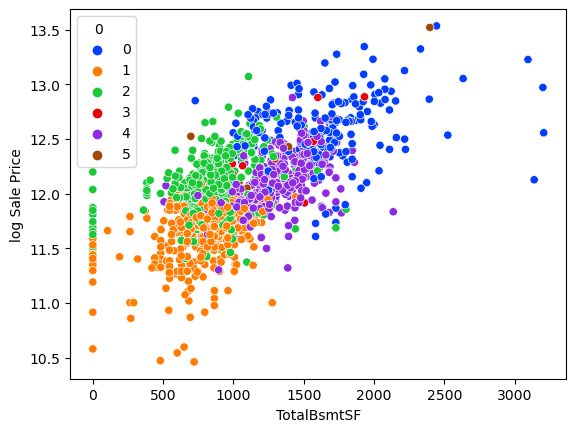

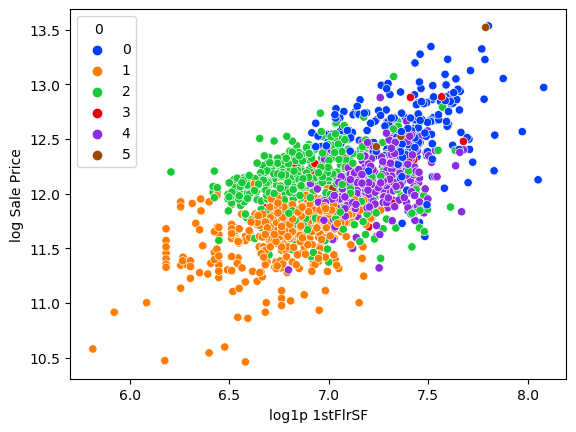

<Figure size 640x480 with 0 Axes>

In [63]:
for i in ['AgeAsset','log1p GrLivArea','GarageArea','LotArea','TotalBsmtSF','log1p 1stFlrSF']:
    sns.scatterplot(x=i,y='log Sale Price',hue=0, palette="bright", data=pd.concat([full_data,Cluster], axis=1))
    plt.show()
    plt.clf()

The main statistics are presented in the next tables. We can see there is a cluster (cluster 6) with a high Lot Area with good quality Kitchen and an excellent Pool quality (main differentiator); this cluster is also among the high log of the sale price within a low-density area (RL), which could indicate a zone of wealthy individuals. While cluster 4, with a low Lot Area but they are the most recent, should indicate a new housing area with high density (apartments) with average quality.

In [64]:
data_target = datanum+ ['log Sale Price']
newdata=pd.concat([full_data[data_target],Cluster], axis=1).rename(columns={0:'Cluster'})
Cluster_Means = pd.DataFrame()
for i in range(6):
    Cluster_Means['Cluster '+str(i+1)] = pd.DataFrame(newdata[newdata['Cluster']==i].mean())
Cluster_Means=Cluster_Means.round(4)
#Cluster_Means.to_excel(address_file+'/results/Cluster means num.xlsx')
Cluster_Means

Cluster 1  Cluster 2   Cluster 3   Cluster 4   Cluster 5  \
LotArea          14073.7374  7795.6349  10251.8706  12198.2727  10446.1445   
MasVnrArea         331.3485    30.2303     80.3401    136.7273     95.7762   
BsmtFinSF1         709.6818   327.9025    264.5812    582.4545    614.5524   
BsmtFinSF2          20.1768    51.4834     30.1548      4.3636     71.3258   
BsmtUnfSF          910.4394   411.7199    544.3503    563.8636    620.1473   
TotalBsmtSF       1640.2980   791.1058    839.0863   1150.6818   1306.0255   
2ndFlrSF           481.9394   150.1432    815.7741    293.8182     10.4164   
LowQualFinSF         0.0000     8.5477      9.8401      6.5455      0.0000   
FullBath             2.3308     1.1774      2.2754      1.9545      1.7365   
KitchenAbvGr         1.0404     1.0270      1.0939      1.0000      1.0283   
TotRmsAbvGrd         8.1919     5.2801      7.5787      6.4545      6.0425   
BedroomAbvGr         3.1768     2.4938      3.4061      2.6818      2.5921   
Fireplaces           1.0556     0.2054      0.7335      0.7273      0.7450   
GarageCars           2.7525     1.1680      1.8325      1.9545      1.9405   
GarageArea         767.9697   316.8631    465.0939    527.6818    520.8924   
WoodDeckSF         175.5859    52.2697     90.1497     67.1818    108.0765   
OpenPorchSF         89.5909    19.5560     56.0558     44.1818     48.2181   
EnclosedPorch       10.0404    35.5954     22.5406      3.1818      9.6459   
3SsnPorch            0.0000     0.0000      0.0000    220.8636      0.3371   
ScreenPorch         18.3889     5.8154     16.5254      0.0000     24.3456   
PoolArea             0.0000     0.0000      0.0000      0.0000      0.0000   
MiscVal              5.8081    67.5394     44.4924     31.8182     23.6827   
AgeAsset            11.8283    56.0021     36.0584     30.5000     24.7734   
log1p 1stFlrSF       7.3927     6.7819      6.8807      7.1485      7.2221   
log1p GrLivArea      7.6473     6.9425      7.4937      7.3662      7.2290   
log Sale Price      12.5977    11.6510     12.0973     12.2147     12.1038   
Cluster              0.0000     1.0000      2.0000      3.0000      4.0000   

                  Cluster 6  
LotArea          16240.6667  
MasVnrArea          47.1667  
BsmtFinSF1         851.1667  
BsmtFinSF2         171.6667  
BsmtUnfSF          307.3333  
TotalBsmtSF       1330.1667  
2ndFlrSF           907.1667  
LowQualFinSF        65.3333  
FullBath             2.3333  
KitchenAbvGr         1.0000  
TotRmsAbvGrd         8.1667  
BedroomAbvGr         3.8333  
Fireplaces           1.3333  
GarageCars           2.0000  
GarageArea         574.3333  
WoodDeckSF         204.1667  
OpenPorchSF         73.6667  
EnclosedPorch       92.0000  
3SsnPorch            0.0000  
ScreenPorch         73.3333  
PoolArea           591.3333  
MiscVal            333.3333  
AgeAsset            38.3333  
log1p 1stFlrSF       7.3007  
log1p GrLivArea      7.7129  
log Sale Price      12.4996  
Cluster              5.0000

In [65]:
newdata=pd.concat([full_data[datacat],Cluster], axis=1).rename(columns={0:'Cluster'})
Cluster_Means = pd.DataFrame()
for i in range(6):
    try:
        Cluster_Means['Cluster '+str(i+1)] = newdata[newdata['Cluster']==i].mode().iloc[0,:]
    except:
        pass
#Cluster_Means.to_excel(address_file+'/results/Cluster mode cat.xlsx')
Cluster_Means

Cluster 1 Cluster 2 Cluster 3 Cluster 4 Cluster 5 Cluster 6
MSSubClass           20        20        60        20        20        60
MSZoning             RL        RL        RL        RL        RL        RL
Street             Pave      Pave      Pave      Pave      Pave      Pave
Alley                NA        NA        NA        NA        NA        NA
LotShape            IR1       Reg       Reg       IR1       Reg       IR1
LandContour         Lvl       Lvl       Lvl       Lvl       Lvl       Lvl
Utilities        AllPub    AllPub    AllPub    AllPub    AllPub    AllPub
LotConfig        Inside    Inside    Inside    Inside    Inside    Inside
LandSlope           Gtl       Gtl       Gtl       Gtl       Gtl       Gtl
Neighborhood    NridgHt     NAmes   Gilbert   Crawfor     NAmes    NWAmes
Condition1         Norm      Norm      Norm      Norm      Norm      Norm
Condition2         Norm      Norm      Norm      Norm      Norm      Norm
BldgType           1Fam      1Fam      1Fam      1Fam      1Fam      1Fam
HouseStyle       1Story    1Story    2Story    1Story    1Story    2Story
OverallQual           8         5         7         7         6         6
OverallCond           5         5         5         5         5         5
RoofStyle         Gable     Gable     Gable     Gable     Gable     Gable
RoofMatl        CompShg   CompShg   CompShg   CompShg   CompShg   CompShg
Exterior1st     VinylSd   MetalSd   VinylSd   VinylSd   VinylSd   Plywood
Exterior2nd     VinylSd   MetalSd   VinylSd   VinylSd   VinylSd   Plywood
MasVnrType      BrkFace      None      None   BrkFace      None      None
ExterQual            Gd        TA        TA        Gd        TA        Gd
ExterCond            TA        TA        TA        TA        TA        TA
Foundation        PConc    CBlock     PConc    CBlock     PConc    CBlock
BsmtQual             Gd        TA        Gd        Gd        Gd        TA
BsmtCond             TA        TA        TA        TA        TA        TA
BsmtExposure         No        No        No        No        No        Av
BsmtFinType1        GLQ       Unf       Unf       GLQ       GLQ       ALQ
BsmtFinType2        Unf       Unf       Unf       Unf       Unf       LwQ
Heating            GasA      GasA      GasA      GasA      GasA      GasA
HeatingQC            Ex        TA        Ex        Ex        Ex        TA
CentralAir            Y         Y         Y         Y         Y         Y
Electrical        SBrkr     SBrkr     SBrkr     SBrkr     SBrkr     SBrkr
BsmtFullBath          1         0         0         0         1         1
KitchenQual          Gd        TA        Gd        Gd        Gd        Gd
Functional          Typ       Typ       Typ       Typ       Typ       Typ
FireplaceQu          Gd        NA        NA        Gd        NA        TA
GarageType       Attchd    Detchd    Attchd    Attchd    Attchd    Attchd
GarageFinish        Fin       Unf       Unf       RFn       RFn       Fin
GarageQual           TA        TA        TA        TA        TA        TA
GarageCond           TA        TA        TA        TA        TA        TA
PavedDrive            Y         Y         Y         Y         Y         Y
PoolQC               NA        NA        NA        NA        NA        Ex
Fence                NA        NA        NA        NA        NA     GdPrv
MiscFeature          NA        NA        NA        NA        NA        NA
SaleType             WD        WD        WD        WD        WD        WD
SaleCondition    Normal    Normal    Normal    Normal    Normal    Normal
Cluster               0         1         2       3.0         4       5.0

## 5.2 - PCA Dataset

When we apply k-Means to our PCA dataset (numerical variables only), we reach a potential number of 3 clusters using the Silhouette method . We can see a clear distinction of each cluster.

Text(0, 0.5, 'Silhouette Score')

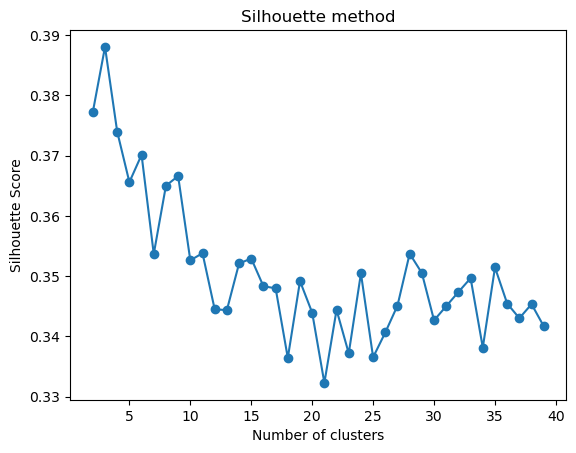

In [66]:
inertias = []
for i in range(2,40):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(full_PCA_data[['PC 1','PC 2']])
    inertias.append(silhouette_score(full_PCA_data[['PC 1','PC 2']],kmeans.labels_))

plt.plot(range(2,40), inertias, marker='o')
plt.title('Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

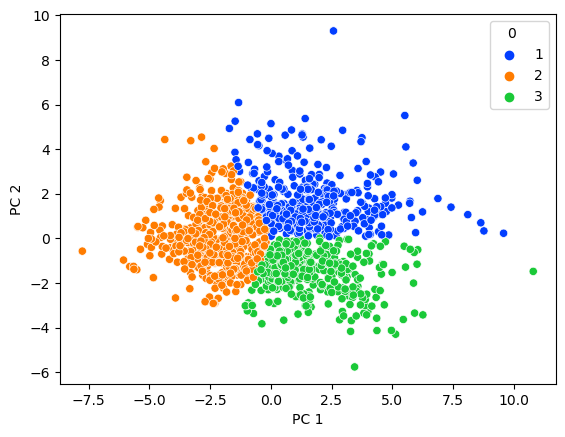

<Figure size 640x480 with 0 Axes>

In [67]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(full_PCA_data[['PC 1','PC 2']])

Cluster = pd.DataFrame(kmeans.labels_+1)
Cluster.index = full_data.index

sns.scatterplot(x='PC 1',y='PC 2',hue=0, palette="bright", data=pd.concat([full_PCA_data,Cluster], axis=1))
plt.show()
plt.clf()

We see that clusters 2 and 3 have a high PC1, while cluster 1 has a low PC1, but when we analyse for PC2, cluster 2 has a high-value while is offset by cluster 3.
When we apply K-means to our MCA dataset (categorical variables only), we reach a potential number of three clusters, even if it does not have the highest Silhouette score, as the values are very close. Again, we can see a clear distinction of each cluster, which is made mainly using MPC1 (Cluster 2 versus 1 and 3), and then MPC2 is used to distinguish the low values for MPC1.


Text(0, 0.5, 'Silhouette Score')

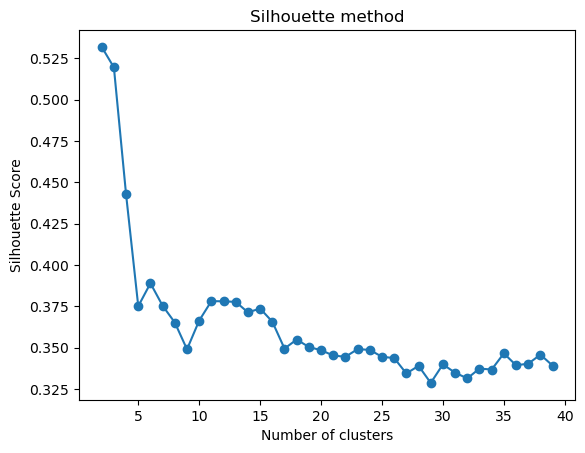

In [68]:
inertias = []
for i in range(2,40):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(full_PCA_data[['MPC 1','MPC 2']])
    inertias.append(silhouette_score(full_PCA_data[['MPC 1','MPC 2']],kmeans.labels_))

plt.plot(range(2,40), inertias, marker='o')
plt.title('Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

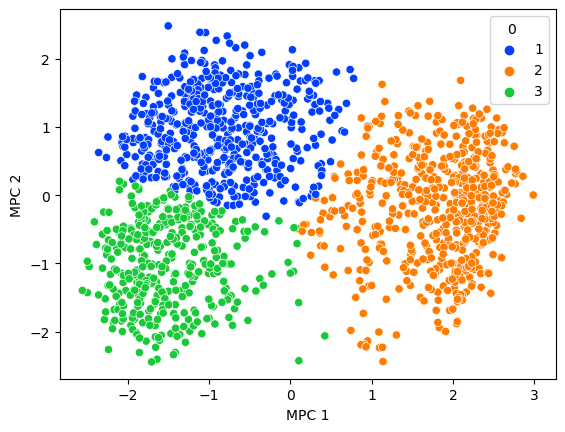

<Figure size 640x480 with 0 Axes>

In [69]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(full_PCA_data[['MPC 1','MPC 2']])

Cluster = pd.DataFrame(kmeans.labels_+1)
Cluster.index = full_data.index


sns.scatterplot(x='MPC 1',y='MPC 2',hue=0, palette="bright", data=pd.concat([full_PCA_data,Cluster], axis=1))

plt.show()
plt.clf()

However, if we apply the same methodology to the whole PCA dataset, we will choose 2 clusters which maximize the average silhouette score. Next figure demonstrates that the effect of clustering is more visible within the first two numerical principal components (PC1 and PC2). In contrast, within the principal categorical component (MC1 and MC2), there is more overlap in some observations.

Text(0, 0.5, 'Silhouette Score')

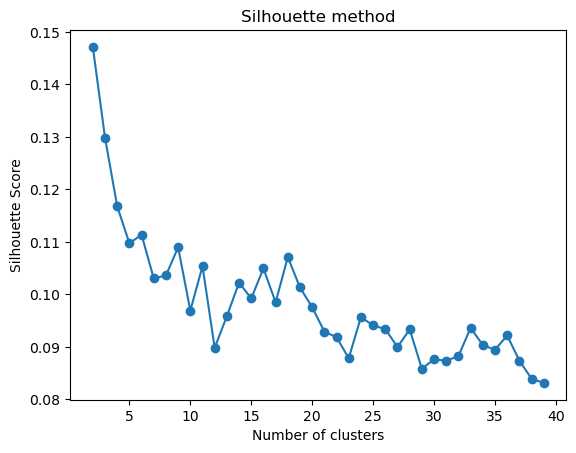

In [70]:
inertias = []
for i in range(2,40):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(full_PCA_data)
    inertias.append(silhouette_score(full_PCA_data,kmeans.labels_))

plt.plot(range(2,40), inertias, marker='o')
plt.title('Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

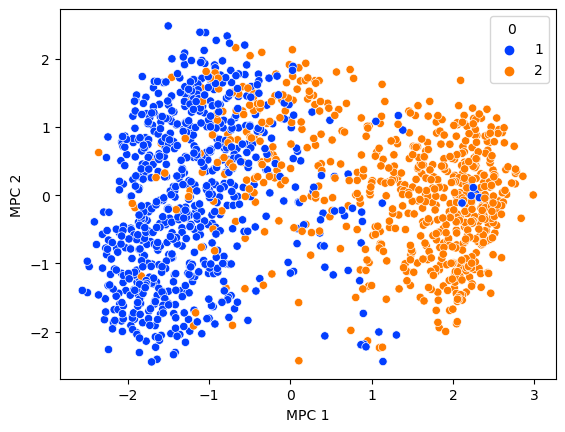

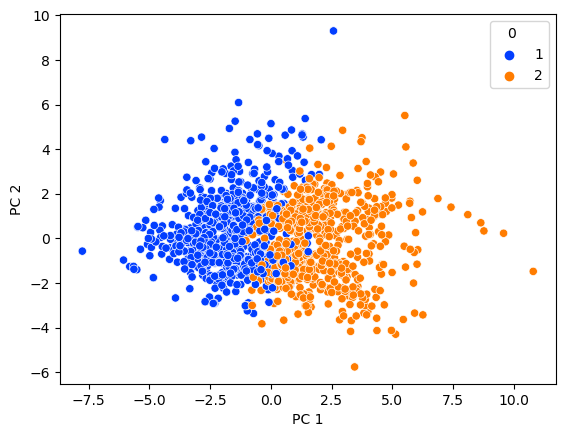

<Figure size 640x480 with 0 Axes>

In [71]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(full_PCA_data)

Cluster = pd.DataFrame(kmeans.labels_+1)
Cluster.index = full_data.index


sns.scatterplot(x='MPC 1',y='MPC 2',hue=0, palette="bright", data=pd.concat([full_PCA_data,Cluster], axis=1))

plt.show()
plt.clf()

sns.scatterplot(x='PC 1',y='PC 2',hue=0, palette="bright", data=pd.concat([full_PCA_data,Cluster], axis=1))

plt.show()
plt.clf()

In [72]:
#del Cluster, kmeans, inertias, newdata

# 6 - Estimation

## 6.1 - Linear Regression

In this section, we will start by estimating our log of Sale Prices by Ordinary Least Squares (OLS ). Next Table gives us a summary of the model, we can see this model explains 94.9% of the total variance in the log of Sale Price, and the whole model is significant (F-statistic p-value ~ 0).

In [73]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics

In [74]:
full_data['BsmtFullBath'] =full_data['BsmtFullBath'].astype(float)
reg_data = pd.get_dummies(full_data)
target= reg_data['log Sale Price']
reg_data = reg_data.drop(['log Sale Price'],axis=1)
reg_data = sm.add_constant(reg_data)

model = sm.OLS(target, reg_data).fit()
model.summary().tables[0]

<class 'statsmodels.iolib.table.SimpleTable'>

As there are too many coefficients, the whole table can be found in the Appendix. From the numerical variables only: ‘LotArea’, ‘BsmtFinSF1’, ‘TotalBsmtSF’, ‘2ndFlrSF’, ‘log1p GrLivArea’, ‘GarageArea’, ‘BsmtFullBath’, ‘FullBath’, ‘WoodDeckSF’, ‘ScreenPorch’ and ‘AgeAsset’ have a p-value below 0.01. From this table, we can already see the most influencing factors are affecting our log of Sale Price. For example, if we increase by 1%, the ‘GrLivArea’ is expected that the Sale Price will increase on average by 0.3% (log-log), while, as expected, for each year the house is not sold, it is expected that the Sale Price will decrease by 0.2% on average (log-level).

If we look at the categorical dummies, the ones that affect the log of Sale Prices. Having central air, with great quality in the garage, while avoiding Edwards neighbourhood, low quality and near positive off-site feature (different from expected).

In [75]:
model.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

## 6.2 - Analysis of Residuals

Next figure shows a sample of the residuals plotted against 'log1p GrLivArea', while the next one is a scatter plot of the residuals versus their predicted value; we can see there might not be evidence for Heteroscedasticity; however, we will need to perform a White's test to confirm our theory.

eval_env: 1


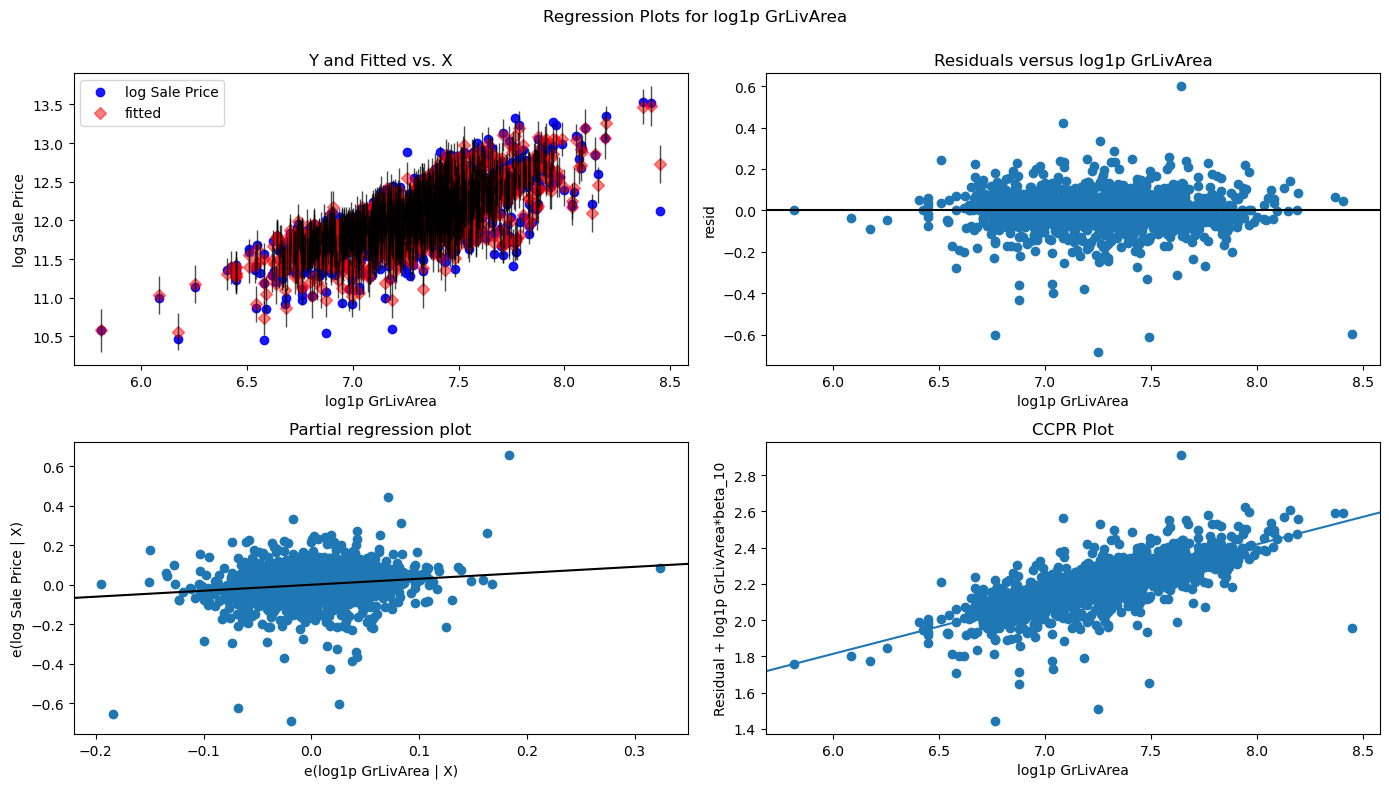

In [76]:
fig = plt.figure(figsize=(14, 8))
# creating regression plot
fig = sm.graphics.plot_regress_exog(model,'log1p GrLivArea',fig=fig)

In [77]:
residuals = pd.DataFrame()
residuals['y pred'] = model.predict(reg_data)
residuals['y real'] = target
residuals['errors'] = residuals['y real'] - residuals['y pred']

<AxesSubplot:xlabel='y pred', ylabel='errors'>

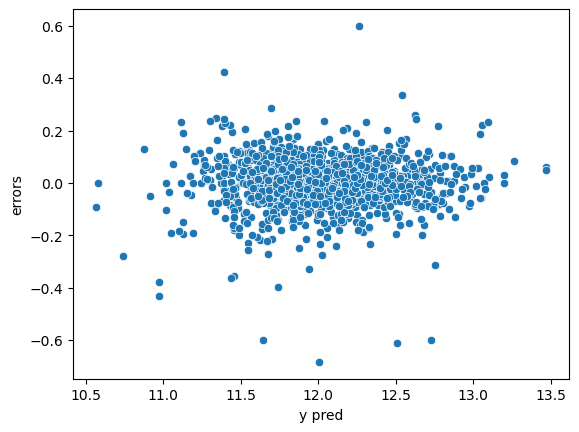

In [78]:
sns.scatterplot(data=residuals,x='y pred', y='errors')

White’s  test for Heteroscedasticity p-value is 0.47295; since the p-value is not less than 0.01, we fail to reject the null hypothesis, which means we do not have sufficient evidence to say that heteroscedasticity is present in the regression model.
Next figure shows us the Q-Q plot of the residuals against a Normal Distribution, as we can see that the residuals do not follow a normal distribution, mainly on its extreme points. However, when we analyse it together with the following figure, it has a normal distribution in the centre of the histogram.


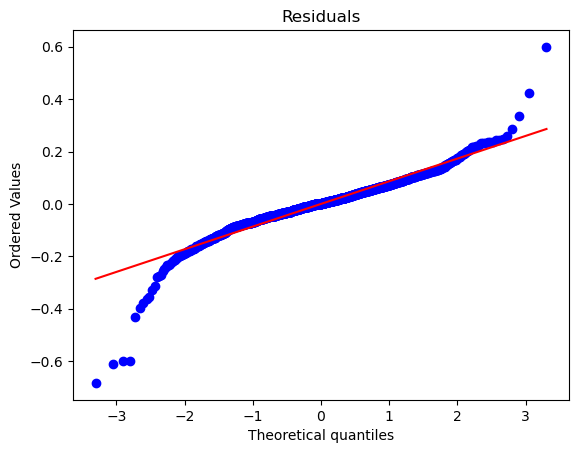

<Figure size 640x480 with 0 Axes>

In [79]:
stats.probplot(residuals['errors'],dist='norm',plot=plt)
plt.title('Residuals')
plt.show()
plt.clf()

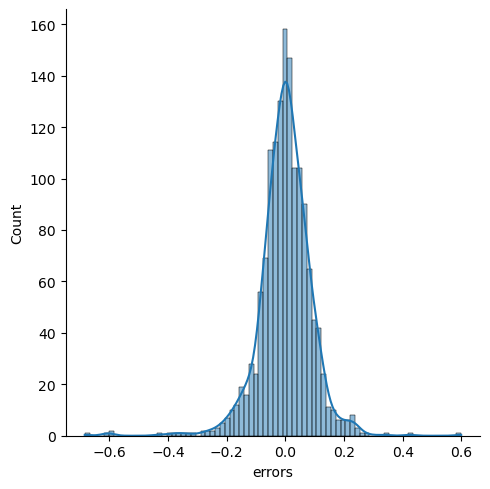

In [80]:
sns.displot(residuals['errors'],kde=True)

In [81]:
#Check for Heterocesdasticity
from statsmodels.stats.diagnostic import het_white
white_test = het_white(model.resid,  model.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 1454.9917058091146, 'Test Statistic p-value': 0.4729534467194554, 'F-Statistic': 241.62945302253985, 'F-Test p-value': 0.004130004503003208}


We can identify eight possible ids if we use the Bonferroni-corrected  p-value of the studentized residual to check for outliers. (31, 463, 524, 633, 826, 969, 971, and 1325). The ids 826 and 524 indicate a Cook’s  distance; they are not considered highly influential due to the high number of observations. The entire distribution and identification of these points are in the next figure, where the orange points are the outliers while the green points are the highly influential observations.

In [82]:
residuals['Leverage'] = model.get_influence().hat_matrix_diag
residuals['Cooks Distance'] = model.get_influence().cooks_distance[0]
residuals['Press Residual'] = model.get_influence().resid_studentized_external
residuals['bonf(p)'] = model.outlier_test()['bonf(p)']

<AxesSubplot:xlabel='Leverage', ylabel='Press Residual'>

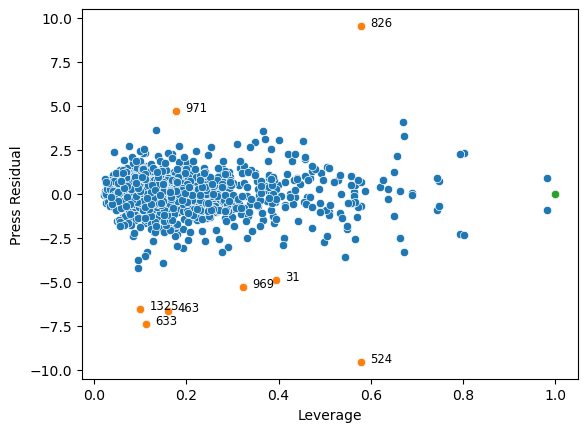

In [83]:
sns.scatterplot(data= residuals, x='Leverage', y='Press Residual')


sns.scatterplot(data= residuals[residuals['bonf(p)'] <=0.01], x='Leverage', y='Press Residual')
for line in residuals[residuals['bonf(p)']<=0.01].index:
     plt.text(residuals.loc[[line]]['Leverage']+0.02,residuals.loc[[line]]['Press Residual'], line,horizontalalignment='left', size='small', color='black')
        
        
sns.scatterplot(data= residuals[residuals['Cooks Distance'] >1], x='Leverage', y='Press Residual')

In [84]:
#residuals[residuals['Cooks Distance'] >1].to_excel(address_file+"/results/residuals.xlsx")
residuals[residuals['Cooks Distance'] >1]

y pred     y real        errors  Leverage  Cooks Distance  \
Id                                                                   
251   11.245046  11.245046  3.197442e-14       1.0    1.195541e+01   
326   11.373663  11.373663 -1.492140e-13       1.0    3.622133e+02   
376   11.018629  11.018629 -6.501466e-13       1.0    4.035018e+02   
584   12.691580  12.691580  3.144152e-13       1.0    9.436911e+01   
811   12.106252  12.106252 -6.856737e-13       1.0    5.935449e+04   
945   11.831379  11.831379 -5.027090e-13       1.0    5.742223e+03   
1188  12.476100  12.476100 -8.473222e-13       1.0    4.441318e+06   
1231  12.154779  12.154779 -2.950529e-12       1.0    1.669236e+02   
1271  12.468437  12.468437  2.096101e-12       1.0    2.573193e+04   
1276  11.827736  11.827736 -2.895462e-13       1.0    2.074485e+06   
1371  11.561716  11.561716  1.350031e-13       1.0    6.671378e+02   
1387  12.429216  12.429216 -7.354117e-13       1.0    1.315087e+02   

      Press Residual  bonf(p)  
Id                             
251         0.000004      1.0  
326        -0.000023      1.0  
376        -0.000048      1.0  
584         0.000023      1.0  
811        -0.000173      1.0  
945        -0.000083      1.0  
1188       -0.000567      1.0  
1231       -0.000083      1.0  
1271        0.000246      1.0  
1276       -0.000274      1.0  
1371        0.000025      1.0  
1387       -0.000039      1.0

If we remove outliers from our regression, the new distribution of residuals can be seen in the next figure. Although it seems closer to a Normal distribution, its KS p-value is 0.0017, which is below our critical value of 1%; therefore, we reject the null hypothesis that the model residuals follow a normal distribution.

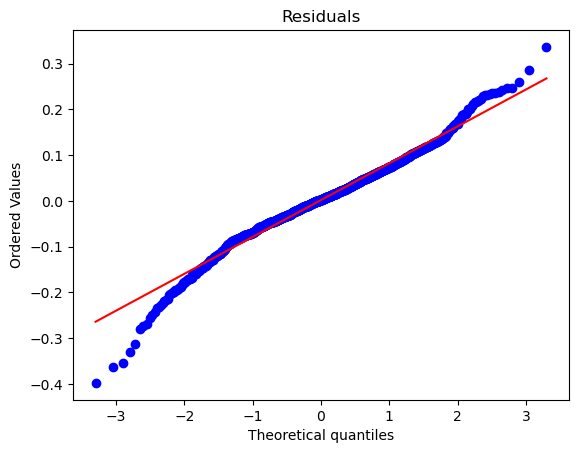

0.0016932338388584549


<Figure size 640x480 with 0 Axes>

In [85]:
stats.probplot(residuals[residuals['bonf(p)'] > 0.01]['errors'],dist='norm',plot=plt)
plt.title('Residuals')
plt.show()
plt.clf()
print(stats.kstest(((residuals[residuals['bonf(p)'] > 0.01]['errors']-residuals[residuals['bonf(p)'] > 0.01]['errors'].mean())/residuals[residuals['bonf(p)'] > 0.01]['errors'].std()),'norm')[1])

As for multicollinearity, we will use the Variance Inflation Factor (VIF) to detect it. Next table shows us only the variables with low values of VIF; as these represent a small sample of the total variables, we can conclude that our model has significant multicollinearity.

In [86]:
#Check for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_df['variable'] = reg_data.columns 

#calculate VIF for each predictor variable 
vif_df['VIF'] = [variance_inflation_factor(reg_data.values, i) for i in range(reg_data.shape[1])]
#vif_df.to_excel(address_file+"/results/VIF.xlsx")
vif_df

variable       VIF
0                    const  0.000000
1                  LotArea  3.035375
2               MasVnrArea  3.158507
3               BsmtFinSF1       inf
4               BsmtFinSF2       inf
..                     ...       ...
321  SaleCondition_AdjLand       inf
322   SaleCondition_Alloca       inf
323   SaleCondition_Family       inf
324   SaleCondition_Normal       inf
325  SaleCondition_Partial       inf

[326 rows x 2 columns]

## 6.3 - Other Models

In this section, we will use different regression models to forecast our log of Sale Price: (1) Linear Regression, (2) Sector Vector Machine, (3) Decision Trees and (4) XGBoost and (5) Light Gradient boosting machine (LGBM).

In [87]:
#Linear Models
from sklearn.linear_model import LinearRegression
for DB in [reg_data,full_PCA_data]:
    linreg= LinearRegression()
    linreg.fit(DB, target)
    y_pred = linreg.predict(DB)
    print(metrics.r2_score(target,y_pred))
    print(metrics.mean_absolute_error(target,y_pred))

0.9485453386401607
0.06245521557588352
1.0
7.752485175389409e-16


In [88]:
#SVM
from sklearn import svm
for DB in [reg_data,full_PCA_data]:
    clf = svm.SVR()
    clf.fit(DB, target)
    y_pred = clf.predict(DB)
    print(metrics.r2_score(target,y_pred))
    print(metrics.mean_absolute_error(target,y_pred))

0.7372701157208179
0.14655574496987095
0.9621477291798899
0.0579391596998365


In [89]:
# Decision Trees
from sklearn import tree
for DB in [reg_data,full_PCA_data]:
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(DB, target)
    y_pred = clf.predict(DB)
    print(metrics.r2_score(target,y_pred))
    print(metrics.mean_absolute_error(target,y_pred))

0.9999914884091786
5.791088908435803e-05
1.0
2.1853462147948097e-16


In [90]:
#XGBoost
from xgboost import XGBRegressor
for DB in [reg_data,full_PCA_data]:
    xg_reg = XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                    max_depth = 5, alpha = 10, n_estimators = 10)
    xg_reg.fit(DB,target)
    preds = xg_reg.predict(DB)
    print(metrics.r2_score(target,y_pred))
    print(metrics.mean_absolute_error(target,y_pred))

[10:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
1.0
2.1853462147948097e-16
[10:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
1.0
2.1853462147948097e-16


In [91]:
#LGBM
import lightgbm as ltb

for DB in [reg_data,full_PCA_data]:
    model = ltb.LGBMRegressor()
    model.fit(DB, target)
    y_pred = model.predict(DB)
    print(metrics.r2_score(target,y_pred))
    print(metrics.mean_absolute_error(target,y_pred))

0.9843958559403395
0.03238958335983967
0.9974250520804311
0.004717778352033717


Overall, the performance of regressors is higher on the PCA dataset, and because we are using some principal components, it is faster to compute than the Normal dataset. Although Decision Trees and LGBM outperformed other models, there is still the possibility of being highly biased. To overcome this, we would need to test these models in a test dataset to fully grasp their accuracy, for example to do a 80:20 split of the data, which we are not applying to this work.